**AT82.03: Machine Learning**
>  Student Name: Israt Jahan Nipa  
Student ID: st124984

# **A2: Predicting Car Price**
**Assignment 02**



## Step 1. Import lib
Here we import the essential libraries that is needed to perform the operation of Loading data, EDA, Preprocessing, Feature Selection, Testing and Inference.

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [189]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '1.5.3', '0.13.2', '3.9.3')

In [190]:
pip install mlflow


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [191]:
import mlflow
import os

In [192]:
mlflow.__version__

'2.20.2'

Before performing the operation below to setup mlflow we run command: mlflow ui in the terminal to host mlflow in local server in this case hosted at http://127.0.0.1:5000, here it creates an experiment to track the operation with name predictprice-regularization.

## Step 2. Load data
To load the data we use Pandas which we have already imported above in the Import lib section.

In [193]:

df = pd.read_csv('/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/data/Cars.csv')

Now we check the type, shape, describe, info, columns of the loaded dataframe

In [194]:
# Check the shape of your data
df.shape #provides information about the number of rows and columns in a DataFrame

(8128, 13)

There are 8128 rows and 13 columns in the dataframe

In [195]:
# Statistical info
df.describe() #returns description of the data in the DataFrame
#if the DataFrame contains numerical data, the description contains information such as count, mean, std, min, 25%, 50%, 75%, and max

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Currently we have only four features in the dataframne with numerical values. Hence, the describe is only returning us with the data description of those features.

In [196]:
# Check dtypes and non-null counts of your input data
df.info() #prints information about the DataFrame
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Here we can see that some of the features contain null values in it. Like mileage, engine, max_power, torque, seats. If these features are deemed important later during the EDA then we must perform some operation to replace the null values with mean, median or mode in the X_train and X_test dataset.

In [197]:
df.dtypes #returns a Series with the data type of each column
#You can check dtype either way from info or from dtype

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [198]:
df.dtypes.value_counts()

object     9
int64      3
float64    1
dtype: int64

The above command provides us with an overview of the dataframe the total number of data types we have in the dataframe, This dataframe contains: 9 objects, 3 integers, and 1 float. 

In [199]:
# Check the column names
df.columns #returns the label of each column in the DataFrame

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [200]:
df.head() #shows the first five rows in a dataframe with heading

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

Furthermore, looking at the dtypes, columns, head and info. We can guess from the domain knowledge about which features can have relation and affect prediction of the selling price. From this we can make an inference that features $\mathbf{X}$ like brand, year, km driven, fuel, seller type, transmission, owner, mileage, engine capacity, max power, and seats can affect our target selling price $\mathbf{y}$.

However, to be sure of this we must run EDA to understand the whole scenario of the data before choosing the features.

## Step 3. Exploratory Data Analysis (EDA)

EDA is an essential step to understand and inspect the data, to have a better comprehension about the nature of the given data.  

In EDA we perform label encoding, mapping, univariate and multivariate analysis to determine the probable features. In this section we perform, univariate analysis like: [countplot, distribution plot], and multivariate analysis like [boxplot, scatterplot, correlation matrix] which helps us to determine features.

In [201]:
#rename column name to brand
df.rename(columns = {'name':'brand'}, inplace = True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Here feature 'name' has been changed to 'brand'.

Now we perform some analysis and try to find some relation of the features with the target.

First let's see how many unique categorical values are there for the features in the dataframe

In [202]:
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

**For the feature brand, take only the first word and remove the rest.**  
Since we have many brand names let us only take the first word and remove the rest.

In [203]:
#split the string and keep the first word then check for the unique values
df['brand'] = df['brand'].str.split().str[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [204]:
df['brand'].iloc[50] #this is to check if the value in the brand has any trailing spaces or not

'Honda'

**Drop the feature torque, simply because Chaky’s company does not understand well about it.**

In [205]:
#drop the torque feature
df.drop('torque', axis='columns', inplace=True)
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Now we have a dataframe as below

In [206]:
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner     mileage   engine   max_power  seats  
0   First Owner   23.4 kmpl  1248 CC      74 bhp    5.0  
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp    5.0  
2   Third Owner   17.7 kmpl  1497 CC      78 bhp    5.0  
3   First Owner   23.0 kmpl  1396 CC      90 bhp    5.0  
4   First Owner   16.1 kmpl  1298 CC    88.2 bhp    5.0

**2.1 Univariate analysis**

Single variable exploratory data anlaysis. This analysis provides basic properties and distribution of the variable within a dataset. This method includes observing the central tendency of the mean, median, and mode which indicates the central or typical value of the variable. This analysis also includes the range, variance, standard deviation, and interquartile range (IQR), which describes the spread or variability in the data. Precentiles and Quartiles provide the insight to the distribution of the data. We perform operations such as countplot, boxplot, frequency distribution and others to analyze and understand the single variable's characteristics, distribution, and quality.

Now we perform the univariate analysis (looking at one feature at a time). And trying to find the distribution of the feature, identification of outliers if any, understand data distribution, assess the data quality by revealing missing values, extreme values and any inconsistencies in the data.

**For Continuous Data**: It provides insights into the range, variability, and central tendency of the data.

**For Categorical Data**: It gives an overview of the distribution of different categories and the proportion of each category in the dataset.

Before we perform analyis we can see that some continuous data in the dataframe contains string values together with numeric data. Hence we perform some operations to clean this.

**For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).**  

_Hint: use df.mileage.str.split_

In [207]:
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [208]:
df['mileage'].iloc[40]

16.1

So here we have removed 'kmpl' from mileage

**For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol**

In [209]:
#drop rows where the 'fuel' is 'CNG' or 'LPG'
indexFuel = df[(df['fuel'] == 'CNG') | (df['fuel'] == 'LPG')].index 
df.drop(indexFuel, inplace=True)

**For the feature engine, remove “CC” and convert the column to numerical type (e.g., float).**

In [210]:
df['engine'] = df['engine'].str.split().str[0].astype('Int64')
df['engine'].iloc[40]

1497

**Do the same for max power.**

In [211]:
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power'].iloc[40]

117.3

So, we removed bph from max_power here.

Now we can perform some univariate analysis.

<Axes: xlabel='brand', ylabel='count'>

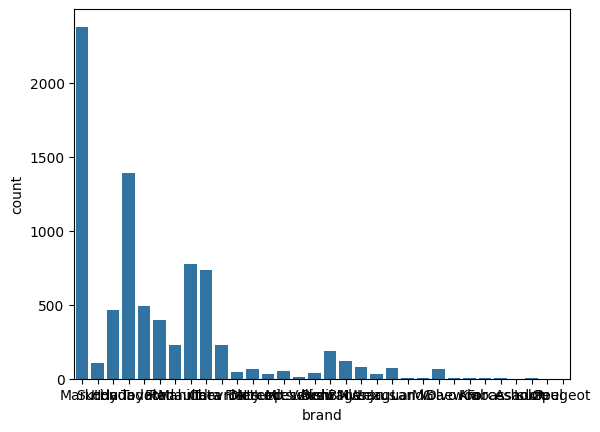

In [212]:
#countplot
sns.countplot(data = df, x='brand')

<Axes: xlabel='fuel', ylabel='count'>

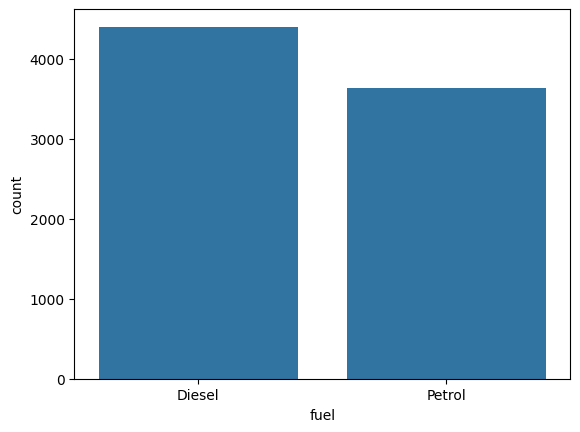

In [213]:
#countplot
sns.countplot(data = df, x='fuel')

<Axes: xlabel='seller_type', ylabel='count'>

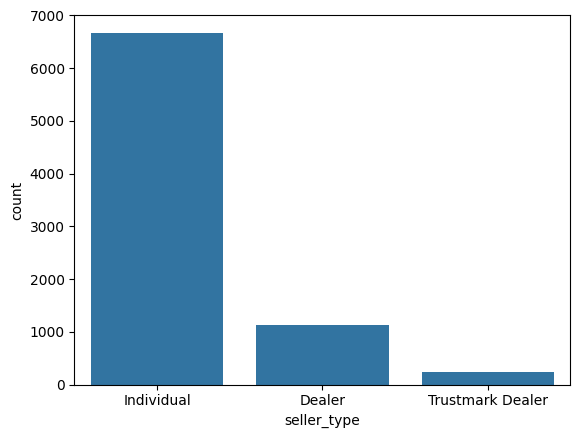

In [214]:
#count plot
sns.countplot(data=df, x='seller_type')

<Axes: xlabel='transmission', ylabel='count'>

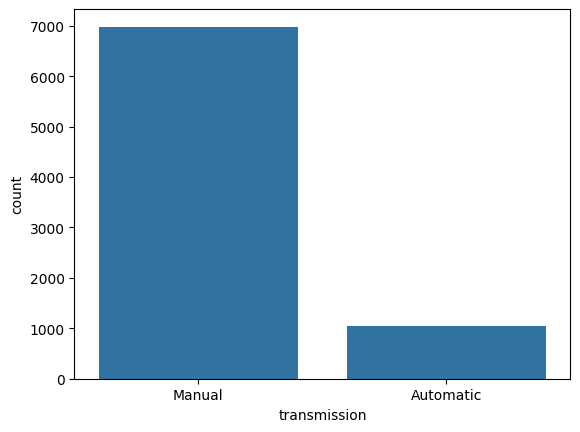

In [215]:
#count plot
sns.countplot(data=df, x='transmission')

<Axes: xlabel='owner', ylabel='count'>

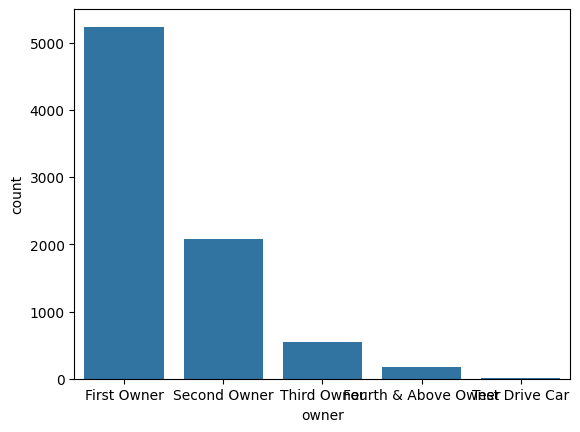

In [216]:
#count plot
sns.countplot(data=df, x='owner')

<Axes: xlabel='seats', ylabel='count'>

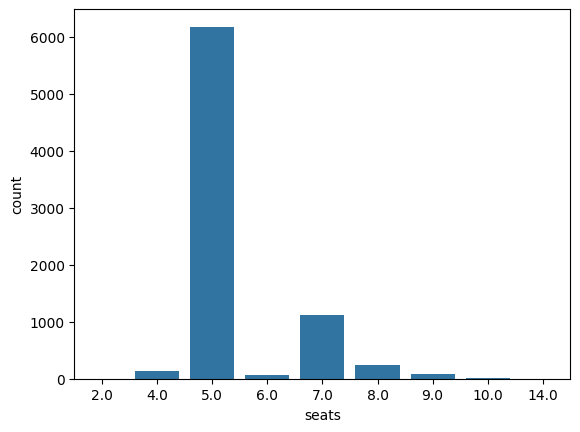

In [217]:
#count plot
sns.countplot(data=df, x='seats')

By performing the count plots in the frequency distribution of categorical variables we are trying to identify if there exists any class imbalances, and detect any rare categories and trends.

Here we came to find out features like brand, seller type, transmission, owner, and seats because of their fequency distribution can result in class imbalance if used for modelling. So, if these categories are to be used then we need to perform some operations like Label encoding or one hot encoding.

We must have some domain knowledge for this so that we can choose features as such.

Fuel type: Disel and Petrol on the other hand shows an almost equal number however some less amount in vehicles operated from petrol. We need further analysis if we can assume fuel as a feature or not.

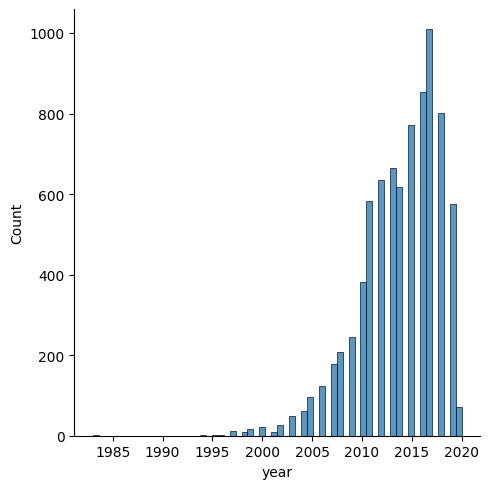

In [218]:
#distribution plot
sns.displot(data=df, x='year')

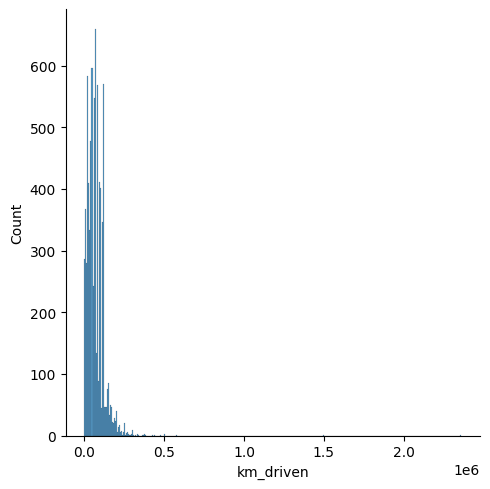

In [219]:
#distribution plot
sns.displot(data=df, x='km_driven')

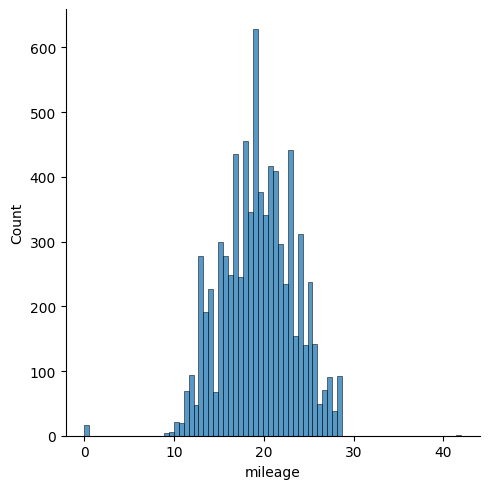

In [220]:
#distribution plot
sns.displot(data=df, x='mileage')

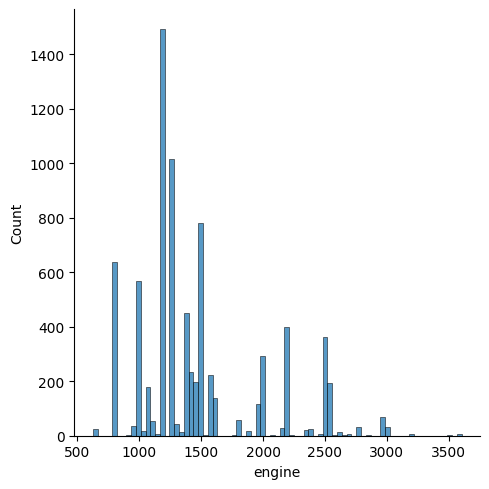

In [221]:
#distribution plot
sns.displot(data=df, x='engine')

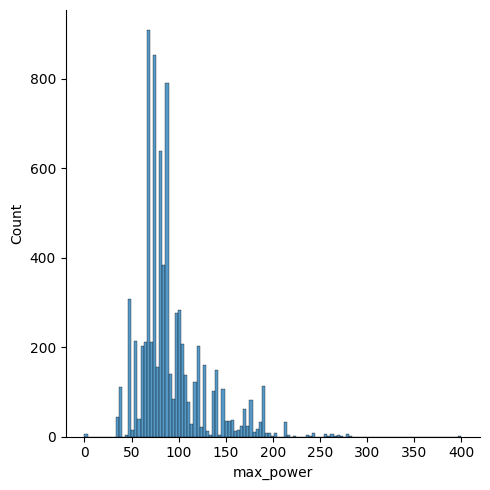

In [222]:
#distribution plot
sns.displot(data=df, x='max_power')

Distribution plot helps to understand the underlying pattern of data, such as its shape, spread, and central tendency. This plot is mostly used in context of continuous data.

Here in this dataset we are trying to infer the shape (Normal, Skewness, bi or multimodal distribution), central tendency, spread of data, and if presence of any outliers.

**year** depicts a distribution plot indicating that there is more data from the recent year as the graph skew more towards the left indicating more data points are clustered to the right. 

**km_driven** is more skewed towards right indicating more data points are clustered to the left. 

**mileage** depicts a central tendency with some outliers. It typically shows of a normal distribution of data.

**engine** on the other hand shows a spread of data with a wider disrtibution indicating higher variablity in the data. However, much of the data here also seemes to be to the left side.

**max_power** feature is more skewed towards right indicating more data points are clustered to the left. We can also see some outliers in max_power.

**2.2 Multivariate analysis**

Multiple variable exploratory data analysis. This involves involves examining more than two variables simultaneously to understand relationships and patterns within the data.

<Axes: xlabel='mileage', ylabel='selling_price'>

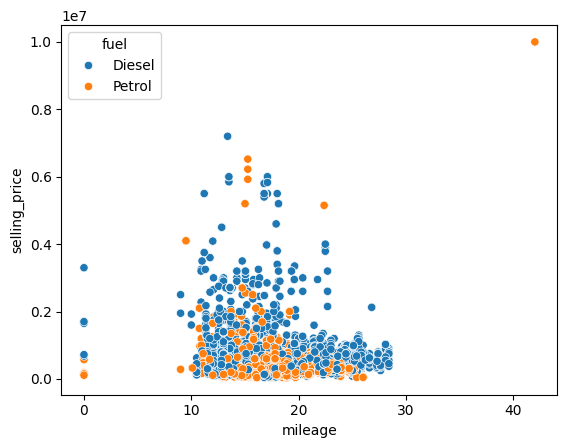

In [223]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

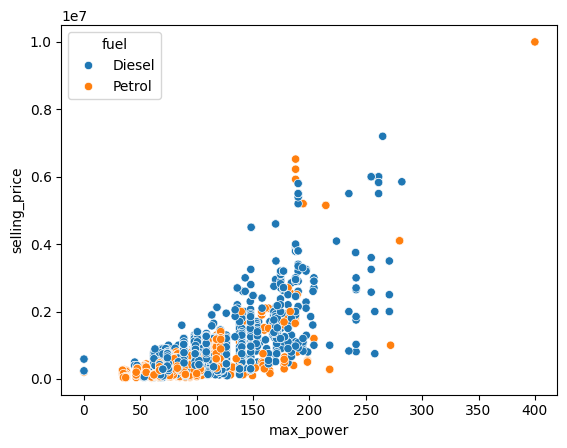

In [224]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

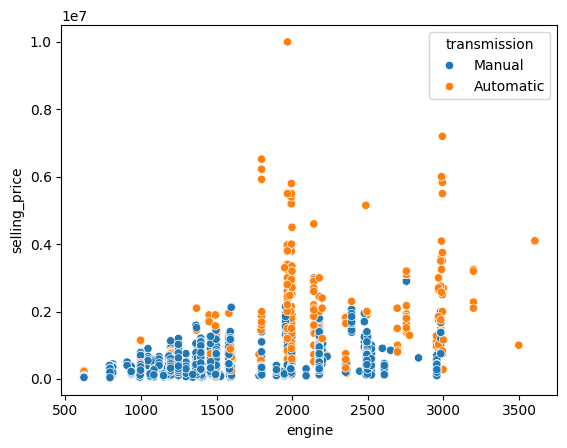

In [225]:
sns.scatterplot(x = df['engine'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='engine', ylabel='max_power'>

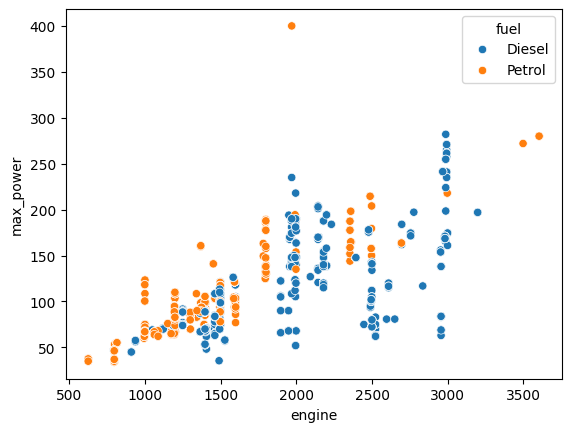

In [226]:
sns.scatterplot(x=df['engine'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='mileage'>

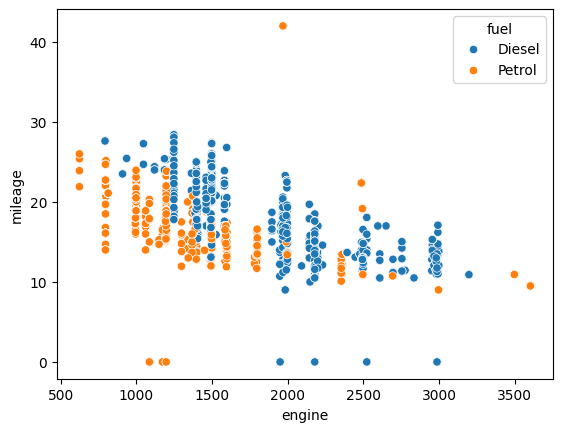

In [227]:
sns.scatterplot(x=df['engine'], y=df['mileage'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='max_power'>

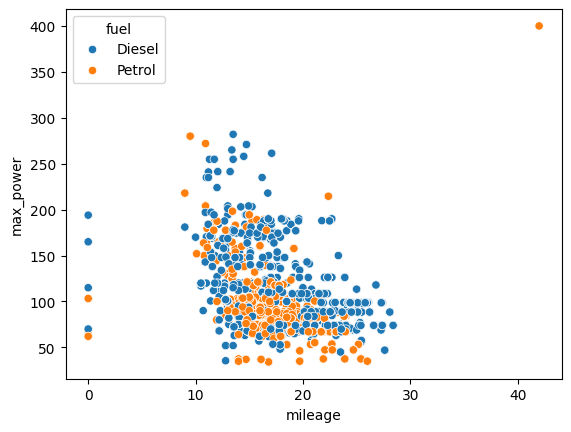

In [228]:
sns.scatterplot(x=df['mileage'], y=df['max_power'], hue=df['fuel'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

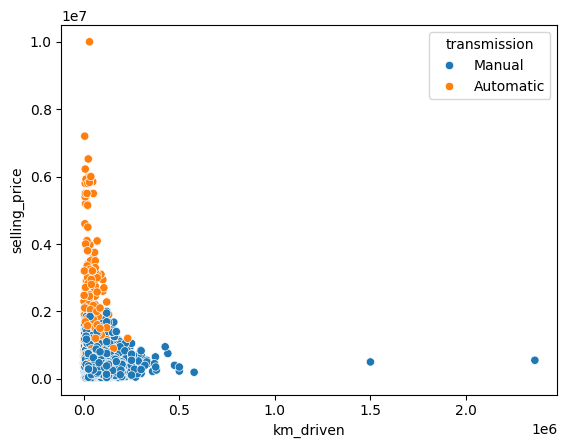

In [229]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['transmission'])

<Axes: xlabel='owner', ylabel='selling_price'>

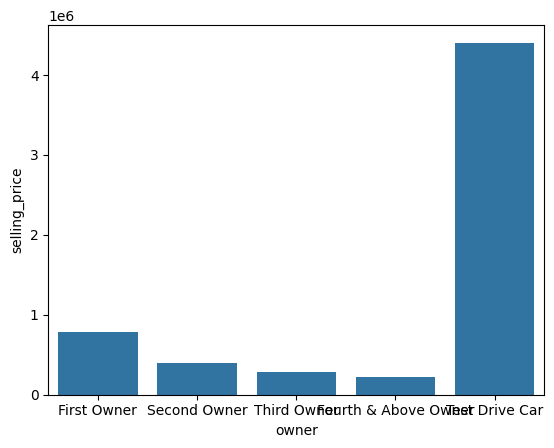

In [230]:
sns.barplot(x=df['owner'], y=df['selling_price'], errorbar=None)

Text(0.5, 0, 'Owner')

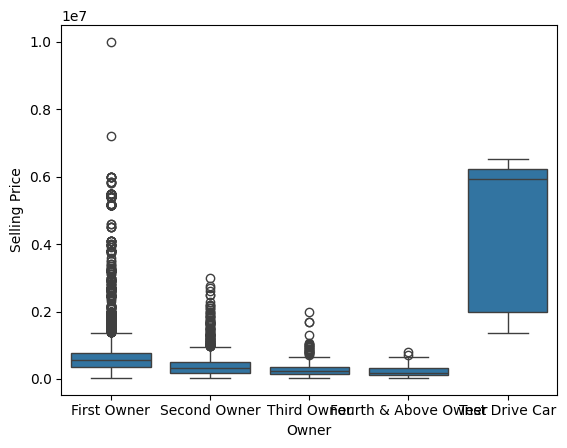

In [231]:
#compare selling price of cars according to owner
sns.boxplot(x = df['owner'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<Axes: xlabel='year', ylabel='selling_price'>

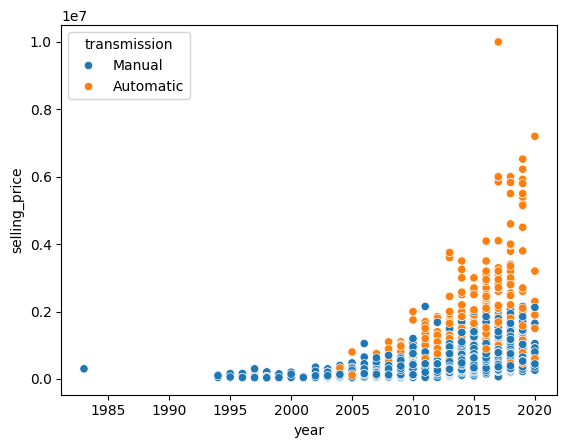

In [232]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['transmission'])

From the scatter plots, bar plots and box plots performed above we can infer some idea about the relationship between the different variables. We can see a clear realtion between some independent variables and also the relation of independent variables with the dependent variable. When we plot dependent variable with few independent variable like max_power, engine, and year we are getting positive correlation, whereas in case of km_driven we are experiencing a negative correlation to the dependent variable.

Some the datapoints are either clustered together or scattered suggesting no correlation. We also performed to check correlation between some independent variable to see how they interact and relate to eachother. In this we found that as engine size increases the mileage decreases relatively, and as engine size increases max_power also increases.

We also encountered some outliers in the data however the outliers seems negligible due to its low frequency.

**Correlation Matrix**

Let's use correlation matrix to identify relationship between multiple variables in a dataset. Also we need to check whether certain features show multicollinearity.

<Axes: >

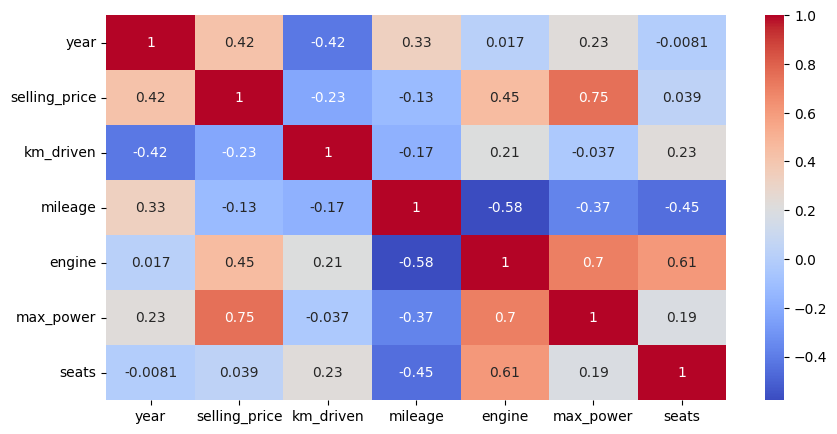

In [233]:
plt.figure(figsize = (10,5))
heatdata = df.corr(numeric_only=True)
sns.heatmap(heatdata, annot=True, cmap="coolwarm")

**Predictive Power Scoring (PPS)**

<Axes: xlabel='x', ylabel='y'>

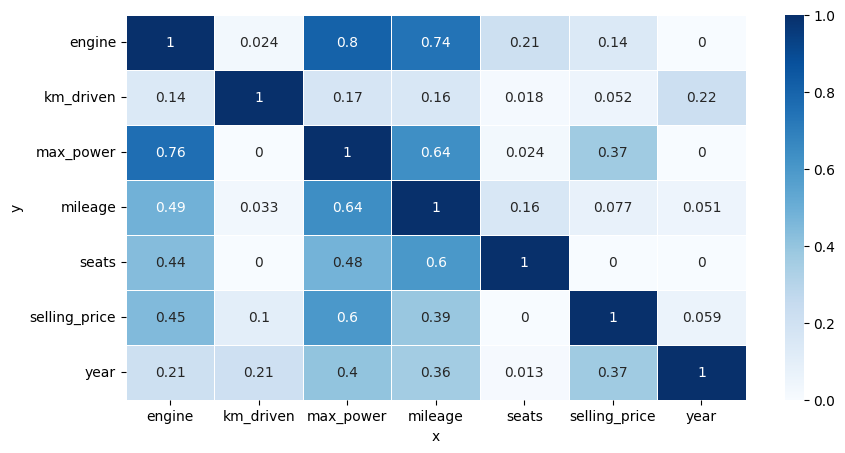

In [234]:
import ppscore as pps

#remove any unnecessary x 
dfcopy = df.copy()
dfcopy.drop(['brand', 'fuel', 'seller_type', 'transmission', 'owner'], axis='columns', inplace=True)

#call pps
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize=(10, 5))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

From the PPS and the analysis performed in EDA we can infer that features such as year, km_driven, max_power, and engine shows a significant role in the increase or decrease of the selling price. However, we can also see the multicollinearity between engine and max_power and both features show postive correlation with selling price. 

=================================================================================

One more thing we observed in the analysis above is of the unusal price for the Test Drive Cars. Hence, we perform the operations below as suggested in the assignment for this.

**For the feature owner, map First owner to 1, ..., Test Drive Car to 5**

Now we would like to change "First owner", "Second owner", "Third owner", "Fourth And Above owner" and "Test Drive Car" to [0, 1, 2, 3, 4, 5], since machine learning algorithms do not understand text. Also, correlation matrix and other similar computational tools require numerical values.

In [235]:
# Map owner to numeric values
owner = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner)

**You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.**

From the above boxplot we can see that Test Drive Cars are very expensive and since we do not want to involve this in we delete all samples related to it.

In [236]:
#drop rows where the 'owner' is '5' i.e. 'Test Drive Cars'
indexOwner = df[(df['owner'] == 5)].index 
df.drop(indexOwner, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4])

### Final Data Table

In [237]:
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40    1248      74.00    5.0  
1      2    21.14    1498     103.52    5.0  
2      3    17.70    1497      78.00    5.0  
3      1    23.00    1396      90.00    5.0  
4      1    16.10    1298      88.20    5.0

## Step 4. Feature selection

In feature selection we need to select the most salient $\mathbf{X}$.

Hence from the inference made above in EDA we can identify several features that might influence the selling price of a car, such as brand, year, kilometers driven, fuel type, seller type, transmission, ownership, mileage, engine capacity, and maximum power. However, **based on the final data provided in the data table**, we will focus on the following key features for predicting the selling price: **_year, kilometers driven, ownership, mileage, and engine capacity_**.

In [238]:
from sklearn.model_selection import train_test_split

#select the features
X = df[['year', 'km_driven', 'mileage', 'engine']]

#decide the target - as suggested in the question selling price is a big number and it can cause prediction to be very unstable. One trick is to first transform the label using log transform
y = np.log(df[['selling_price']])

m = X.shape[0] #number of samples
n = X.shape[1] #number of features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Step 5. Preprocessing

Check for any null values in the feature and target

In [239]:
#check for null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year           0
km_driven      0
mileage      154
engine       154
dtype: int64

In [240]:
#check for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year          0
km_driven     0
mileage      60
engine       60
dtype: int64

Now check the distribution of the features with Null value and impute the missing values

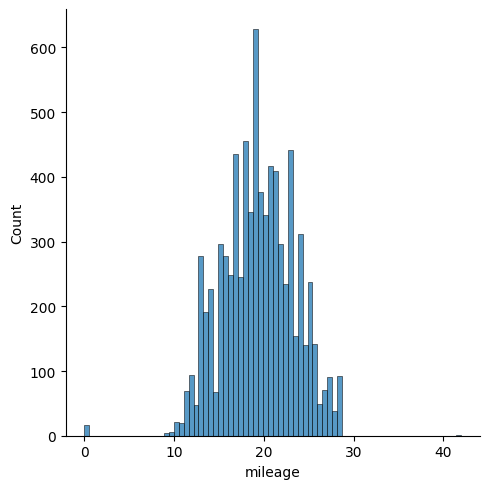

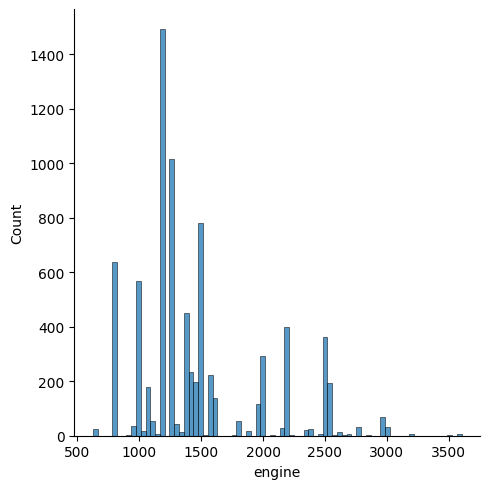

In [241]:
sns.displot(data=df, x='mileage')
sns.displot(data=df, x='engine')

Since, mileage has more values centered towards the middle we can perform mean to impute it's missing values.

Here engine is skewed towards right indicating more data points are clustered to the left. So we can perform median to impute the missing values of engine.

In [242]:
#let's fill the training set first
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

In [243]:
#let's fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [244]:
#check again if there are still any null values
print("X train:")
X_train[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X train:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [245]:
#check again for null values
print("X test:")
X_test[['year', 'km_driven', 'mileage', 'engine']].isna().sum()

X test:


year         0
km_driven    0
mileage      0
engine       0
dtype: int64

In [246]:
assert(X_train.shape[0] == y_train.shape[0])

In [247]:
assert(X_test.shape[0] == y_test.shape[0])

**Feature Scaling**

In this experiment we are performing many tests to find the best model for our use, in the dataframe it is obvious that the features that we have chosed are very large in numbers and it might later affect the computation. Hence, to avoid such issues we are scaling the features using the MinMaxScaler function.  

The MinMaxScaler function rescales the data to specified range often between 0 and 1. This ensures that all features contribute equally to the model by placing them in the same scale. This method also inproves the convergence rate and prevents dominiance of one feature over the other. 

In [248]:
from sklearn.preprocessing import MinMaxScaler

#predefine the selected features that we received from performing EDA
num_cols = ['year', 'km_driven', 'mileage', 'engine']

#create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

#fit and transform the data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [249]:
#to remove single-dimensional entries from the shape of an array or DataFrame
y_test = y_test.squeeze()
y_train = y_train.squeeze()

In [250]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## Step 6. Model Selection and MLFlow


**Based on 03 - Regularization.ipynb, modify LinearRegression() class as follows:**

**Task 1. Implementation**  
- Add a function r2 that compute the r2 score.  Be reminded that you have learned this equation in the L1 lecture.  

- As we have discussed in class, there are much better way to initialize the weight aside from zeros.  
- We  shall  start  with  the  defacto  Xavier method  -  please  read  roughly  the  paper  http://proceedings.mlr.press/v9/glorot10a.html.   
– To summarize, the xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range.

$U \left[-\frac{1}{\sqrt{m}}, \frac{1}{\sqrt{m}} \right]$

where m is the number of inputs.

- We can easily implement this in python as follows:
#pseudocode for xavier weight initialization
#number of samples, let's say 10
m = 10
#calculate the range for the weights
lower, upper = -(1.0 / sqrt(m)), (1.0 / sqrt(m))
#summarize the range
print(lower, upper)
#you need to basically randomly pick weights within this range
#generate random numbers
scaled = lower + numbers * (upper - lower)
print(scaled)

- Modify the class such that it allows the user to choose between zeros initialization or xavier. Learn about momentum. In short, momentum is a improved gradient descent technique that help alleviate the local minima stucking problem. A little big longer version, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way. The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation. Implement it so that users can choose whether to use momentum or now, and also the momentum as well which is in range of (0, 1) accordingly. 

**For those who are struggling, here is some pseudocode hint:**  
#pseudocode for momentum  
def update():  
step = alpha * grad  
theta = theta - step + momentum * prev _step  
prev _step = step  

- Implement a function inside the class that can plot the feature importance based on coefficients. Note that although large (positive or negative) magnitude of coefficients can usually indicate strong feature importance, it is important to assume that the input variables have the same scale or have been scaled prior to fitting a model - for further reading - https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

===========================================================================================================

The code below connects to the mlflow server currently running in localhost http://127.0.0.1:5000/. Consequently, as the assignments requests, this instance is also being pushed to the main "http://mlflow.ml.brain.cs.ait.ac.th/" server. As it is taking a longer time to commit all log in the server hence we are also performing this in our local server so that this can run fast. However, this process does not change the output of prediction model.

If we are using "http://mlflow.ml.brain.cs.ait.ac.th/" uri then we need to pass the username and password for the same as well. You can see it in the comments section in the code below. the "LOGNAME" is the name for the system to identify its user where as the experiment_name is the name of the experiment instance running on the server.

**Attached is the mlflow image running in "http://mlflow.ml.brain.cs.ait.ac.th/"**.

<img src="img/mlflow.png" alt="title" style="width: 700px; height: auto;">

**Experiment Name running in mlflow in csim server: st124984_Israt_A2** 

In [251]:


#mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
mlflow.set_tracking_uri("http://127.0.0.1:5001/")



In [252]:
# os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
# os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
os.environ["LOGNAME"] = "st124984"


In [253]:
# This will create an experiment if not already exists
mlflow.set_experiment(experiment_name="st124984_nipa_a2")



<Experiment: artifact_location='mlflow-artifacts:/593246997222306746', creation_time=1739732531913, experiment_id='593246997222306746', last_update_time=1739732531913, lifecycle_stage='active', name='st124984_nipa_a2', tags={}>

Based on the 03-Regularization.ipynb notebook here we need to perform operation of adding **r2**, initializing defacto **Xavier** method to pass theta, implement momentum, and write a class to plot the feature importance.

In [254]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    #cross-validation with KFold
    kfold = KFold(n_splits=3)

    def __init__(self, regularization, lr=0.001, method='batch', init_method='xavier', polynomial=True, degree=3, use_momentum=True, momentum=0.5, num_epochs=500, batch_size=50, cv=kfold):
        self.lr                 = lr                #learning rate
        self.num_epochs         = num_epochs        #number of epochs 
        self.batch_size         = batch_size        #size of batch size for mini
        self.method             = method            #optimize method like stochastic - sto, mini-batch -mini, batch - batch 
        self.polynomial         = polynomial        #boolean using polynomial feature or not
        self.degree             = degree            #degree of polynomial
        self.init_method        = init_method       #weight xavier or zeros
        self.use_momentum       = use_momentum      #boolean to use momentum in gradient descent or not
        self.momentum           = momentum          #momentum coefficient
        self.prev_step          = 0                 
        self.cv                 = cv                #cross-validation method KFold (default 3-fold)
        self.regularization     = regularization    #Regularization method (L2, L1)

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0] #return MSE Loss
    
    def r2(self, ytrue, ypred):
        ss_res = ((ytrue - ypred) ** 2).sum()
        ss_tot = ((ytrue - ytrue.mean()) ** 2).sum()
        return 1 - (ss_res / ss_tot) #return R-squared metrics
    
    def msemean(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores) #returns average mse of all kfold score
    
    def r2mean(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2) #returns average r2 of all kfold score

    def fit(self, X_train, y_train):
        #to perform training and cross-validation
        
        self.columns = X_train.columns

        #initializing polynomial boolean value
        if self.polynomial == True:
            X_train = self._transform_features(X_train)
            print("Using Polynomial")
        else:
            print("Using Linear")
            X_train = X_train.to_numpy()
            
        y_train = y_train.to_numpy()

        #create list of kfold scores
        self.kfold_scores = list()
        self.kfold_r2 = list()

        #reset val loss
        self.val_loss_old = np.inf
        
        #kfold.split in the sklearn to perform cross-validation
        #3 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):

            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]

            #initialize weights with xavier
            if self.init_method == 'xavier':
                #calculate the range for the weights with number of samples
                lower, upper = -(1 / np.sqrt(X_cross_train.shape[0])), 1 / np.sqrt(X_cross_train.shape[0])
                #randomize weights then scale them using lower and upper bounds
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers * (upper - lower)

            #initialize weights with zeros
            elif self.init_method == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])

            else:
                print("Weights not initialized in init method. Must be 'xavier' or 'zero'")
                return
            
            #mlflow starts here
            with mlflow.start_run(run_name=f'Fold - {fold}', nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                    
                    #shuffle your index to make a random model so that it does not have ordered data
                    perm = np.random.permutation(X_cross_train.shape[0])
                    
                    #shuffle based on permutations
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    #stochastic
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, ) 
                            
                            #calculate training loss and update the model weights
                            train_loss = self._train(X_method_train, y_method_train)   
                               
                    #mini-batch
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            
                            #calculate training loss and update the model weights
                            train_loss = self._train(X_method_train, y_method_train)

                    #batch
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        
                        #calculate training loss and update the model weights
                        train_loss = self._train(X_method_train, y_method_train)
                    
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    
                    #predict yhat_val with validation data
                    yhat_val = self._predict(X_cross_val)
                    
                    #calculate mse loss and r2 
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)
                    
                    #log to mlflow
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_r2", value=val_r2_new, step=epoch)

                    # Early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new

                #add to the kfold list
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)

                print(f"Fold {fold}: {val_loss_new}")
                print(f"Fold {fold}: {val_r2_new}")

    def _transform_features(self, X):
        #include polynomial degree here the highest degree is accepted
        X_poly = np.column_stack([X ** (self.degree)])
        return X_poly

    def _train(self, X, y):
        yhat = self._predict(X) #predicts target values with weight
        m = X.shape[0]

        if self.regularization:
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta) #compute with regularization
        else:
            grad = (1/m) * X.T @(yhat - y) #compute without regularization
        
        #momentum
        if self.use_momentum == True: #if true apply the momentum to gradient descent
            self.step = self.lr * grad
            self.theta = self.theta - self.step + self.momentum * self.prev_step
            self.prev_step = self.step
        else:
            self.theta = self.theta - self.lr * grad
        
        return self.mse(y, yhat) #return the MSE loss

    def _predict(self, X):
        return X @ self.theta #predict target values using trained regression model using matrix multiplication
    
    #predict with polynomial: if it is set to true transform features and apply matrix multiplication
    def predict(self, X):
        if self.polynomial == True:
            X = self._transform_features(X)
        return X @ self.theta
    
    def _coef(self):
        return self.theta[0:] #since we are not using any bias or the intercept hence we initialize from 0
    
    def _bias(self):
        return self.theta[0]

    def plot_feature_importance(self, selectedfeatures):
        # Get the coefficients
        coef = self._coef()

        # If lengths don't match, truncate to the shorter one
        min_length = min(len(coef), len(selectedfeatures))
        coef = coef[:min_length]
        selectedfeatures = selectedfeatures[:min_length]

        # Create a figure and axis object with subplots
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot feature importance on the given axis
        ax.barh(selectedfeatures, coef)

        # Set labels and title for the axis
        ax.set_xlabel('Importance (Absolute Value of Coefficient)')
        ax.set_ylabel('Features')
        ax.set_title('Feature Importance')

        # Display the plot
        plt.tight_layout()
        plt.show()

Now we can create `Ridge`, `Lasso`, `Elastic` and `Normal` class that extends the `LinearRegression`, with added penalty.

In [255]:
#classes for Penalty
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta)) #L1 regularization
        
    def derivation(self, theta):
        return self.l * np.sign(theta) #derivative of L1 regularization
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta)) #L2 regularization
        
    def derivation(self, theta):
        return self.l * 2 * theta #derivative of L2 regularization
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l  #strength of regularization
        self.l_ratio = l_ratio #ratio between L1 and L2

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution) #elastic penalty

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation) #derivation of elastic penalty
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init_method, polynomial, degree, use_momentum, momentum)
    def msemean(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

#classes for Lasso, Ridge, ElasticNet, and Normal (No Regularization)
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init_method, polynomial, degree, use_momentum, momentum)
    def msemean(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)
    
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init_method, polynomial, degree, use_momentum, momentum)
    def msemean(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):
    
    def __init__(self, method, lr, l, init_method, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = None #regularization: none
        super().__init__(self.regularization, lr, method, init_method, polynomial, degree, use_momentum, momentum)
    def msemean(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

## Step 6.1 - Experiment

**Task 2. Experiment** - Using A1: Predicting Car Price jupyter notebook that you have submitted as the starter, replace the modeling part with the class we have built above.

- Use cross-validation to compare (1) polynomial, lasso, ridge, normal; (2) with or without momentum; (3) stochastic, mini-batch, batch; (4) zero, xavier; (5) learning rate of 0.01, 0.001, and 0.0001. The comparison should be done in terms of r2 and mse. The entire experiment must be performed using
ML flow.

- Perform the prediction on the test set using the best model and report the mse and r2. Plot the feature importance graph using the function we have built above.

- Write a short report inside the jupyter notebook discussing your findings, together with some captured screenshots of ML flow, and a final table depicting the comparisons.

In [133]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

**Cross-validation and Experiment training**

Here we perform all the regularization methods with different parameters.

In [258]:
#Cross-validation and experiment training
regressions = ["Ridge", "Lasso", "ElasticNet", "Normal"]
ispoly= [True, False]
lrs=[0.01,0.001,0.0001]
methods = ["sto","mini","batch"]
inits =['zeros','xavier']
use_momentums =[True, False]
momentum =""

# Initial placeholders for the best model
best_mse = np.inf
best_r2 = -np.inf
best_model_params = None
best_model = None

#iteration of all regressions
for reg in regressions:
    print("+====+"*5, reg, "+====+"*5)
    
    for method in methods:
        print("+====+"*5, method, "+====+"*5)
        for t in ispoly:
            if t == True:
                print("Polynomial Regression")
            else:
                print("Linear Regression")
            for init in inits:
                print("+====+"*5, init, "+====+"*5)

                for use_momentum in use_momentums:
                    if(use_momentum== True):
                         momentum = "With momentum"
                    else:
                        momentum ="Without momentum"
                    print("+====+"*5, momentum, "+====+"*5)

                    for lr in lrs:
                        print("+====+"*5, lr, "+====+"*5)
                        params = {
                            "method"        :   method,
                            "polynomial"    :   t,  
                            "lr"            :   lr, 
                            "l"             :   0.1, 
                            "init_method"   :   init, 
                            "degree"        :   3, 
                            "use_momentum"  :   use_momentum,  
                            "momentum"      :   0.5
                        }
                        
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)                                            
                        
                        reg_type = str_to_class(reg)    
                        model = reg_type(**params)  
                        model.fit(X_train, y_train)
                        
                        yhat = model.predict(X_train)
                        
                        mse = model.msemean()
                        r2 = model.r2mean()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # Check if this model is the best one so far based on MSE and R2
                        if mse < best_mse or (mse == best_mse and r2 > best_r2):
                            best_mse = mse
                            best_r2 = r2
                            best_model_params = params
                            best_model = model

                        mlflow.end_run()

# Print the best model's parameters and metrics
print("\nBest Model Found:")
print("Parameters:", best_model_params)
print("Best MSE:", best_mse)
print("Best R2:", best_r2)

+====++====++====++====++====+ Ridge +====++====++====++====++====+
+====++====++====++====++====+ sto +====++====++====++====++====+
Polynomial Regression
+====++====++====++====++====+ zeros +====++====++====++====++====+
+====++====++====++====++====+ With momentum +====++====++====++====++====+
+====++====++====++====++====+ 0.01 +====++====++====++====++====+
Using Polynomial
Fold 0: 24.37106961743732
Fold 0: -34.49627531548635
🏃 View run Fold - 0 at: http://127.0.0.1:5001/#/experiments/593246997222306746/runs/3dcc4b12c0eb4c30998607bf98ba2401
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/593246997222306746
Fold 1: 23.458005126009407
Fold 1: -31.43308706297433
🏃 View run Fold - 1 at: http://127.0.0.1:5001/#/experiments/593246997222306746/runs/568c28af41c84e18a4fae9a08d2aa1aa
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/593246997222306746
Fold 2: 22.541291914240727
Fold 2: -31.460510065867794
🏃 View run Fold - 2 at: http://127.0.0.1:5001/#/experiments/593246

## Step 7. Testing on Best Found Model

In [ ]:
# Print the best model's parameters and metrics
print("\nBest Model Found:")
print("Parameters:", best_model_params)
print("Best MSE:", best_mse)
print("Best R2:", best_r2)


Best Model Found:
Parameters: {'method': 'sto', 'polynomial': False, 'lr': 0.01, 'l': 0.1, 'init_method': 'xavier', 'degree': 3, 'use_momentum': True, 'momentum': 0.5}
Best MSE: 0.8058048989111576
Best R2: -0.1490854320213216


In [ ]:
#testing on best parameters
method="sto"
ispoly= False
lrs =[0.01]
init='zeros'
momentum =True
reg = "Normal"


for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init_method" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
    
    print("+====+"*5, reg, "+====+"*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentum: ", momentum)
    print("Initialization: ", init)
    print("Learning Rate: ", lr)
    print("+====+"*5)


    reg_type = str_to_class(reg)    
    model = reg_type(**params)  
    model.fit(X_train, y_train)

    yhat = model.predict(X_test)
    
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

+====++====++====++====++====+ Normal +====++====++====++====++====+
Method: sto
Polynomial:  False
Momentum:  True
Initialization:  zeros
Learning Rate:  0.01
+====++====++====++====++====+
Using Linear
Fold 0: 0.8362646695992879
Fold 0: -0.2180130546043686
🏃 View run Fold - 0 at: http://127.0.0.1:5001/#/experiments/593246997222306746/runs/5161346916ba4452a98cedfc329a3a2e
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/593246997222306746
Fold 1: 0.861582058758365
Fold 1: -0.19122516060087547
🏃 View run Fold - 1 at: http://127.0.0.1:5001/#/experiments/593246997222306746/runs/9e4b2c9885e7424db1220568112561da
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/593246997222306746
Fold 2: 0.7794909467552853
Fold 2: -0.12250326288607694
🏃 View run Fold - 2 at: http://127.0.0.1:5001/#/experiments/593246997222306746/runs/99796060e90c401b8fc5c5782a812289
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/593246997222306746
Best MSE:  0.8305063628348384
Best R2:  0.589232

## Step 8. Analysis : Feature Importance

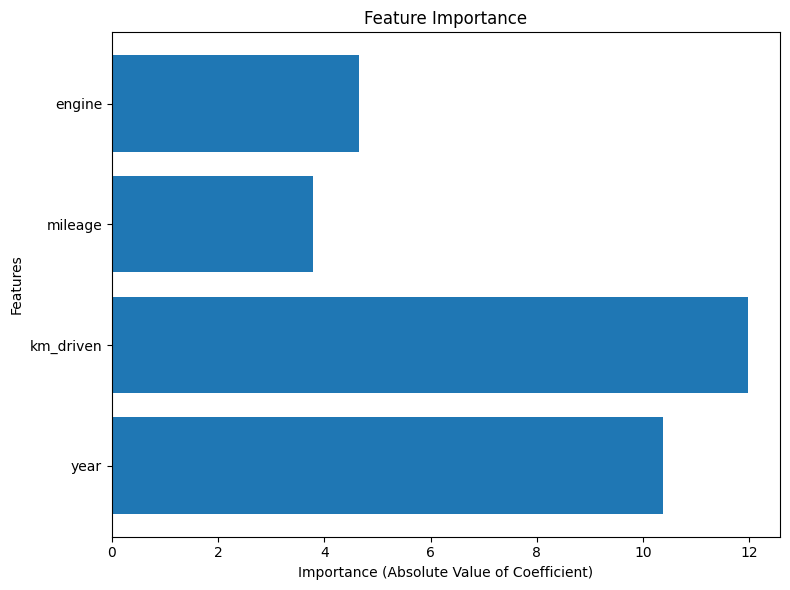

In [ ]:
#feature importance
model.plot_feature_importance(['year', 'km_driven', 'mileage', 'engine'])

From the feature importance graph plot we can understand that features like year, km_driven, engine, plays an important role in price prediction.

## Step 9. Inference

In this instance we create a model for the new set and compare the sample data output with the old prediction model.

In [138]:
#step 1: create and load model
import pickle

# save the model to disk
filename = '/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/model/carpricepredictionA2.pickle'
pickle.dump(model, open(filename, 'wb'))

# load the new model from disk
new_loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
#Loading old model 

filename_old = '/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/model/carpricepredictionA1.pickle'

# Load the old model from disk
old_loaded_model = pickle.load(open(filename_old, 'rb'))


In [141]:
# Create a new DataFrame to store the inverse transformed values
X_test_new_one = pd.DataFrame()

# Perform inverse transformation and assign to new DataFrame
X_test_new_one[num_cols] = scaler.inverse_transform(X_test[num_cols])

In [ ]:
#step:2 predict on X_test for old and new
predict_old = old_loaded_model.predict(X_test_new_one)
np.exp(predict_old)

array([197704.51228839, 862431.31028957, 292153.50974155, ...,
       159671.70995656, 790655.89793439, 305282.79291494])

In [ ]:
predict_new = new_loaded_model.predict(X_test)
predict_new

5948    11.190715
6039    13.931030
3069    12.597404
6531    12.940650
322     14.040283
          ...    
5744    10.862739
1010    14.886341
4856    10.773714
7542    13.831298
560     12.696427
Length: 2409, dtype: float64

In [ ]:
#step 3: predict on a sample
sample = df[['year', 'km_driven', 'mileage', 'engine', 'selling_price']].loc[30]
sample

year               2017.0
km_driven         70000.0
mileage              24.3
engine             1248.0
selling_price    670000.0
Name: 30, dtype: Float64

**Prediction of Car price using old model**

In [145]:
sample_np = np.array([[2017, 70000, 24.3, 1248]])

answer_old = np.exp(old_loaded_model.predict(sample_np))
print(f"Old Predicted selling price: {answer_old[0]}")

Old Predicted selling price: 769481.2527183228


**Prediction of Car price using new model**

In [146]:
# Define our own sample of car
sample_np_new = pd.DataFrame([[2017, 70000, 24.3, 1248]], columns=['year', 'km_driven', 'mileage', 'engine'])

answer_new = (new_loaded_model.predict(sample_np_new))[0]
print(f"New Predicted selling price: {answer_new}")

New Predicted selling price: 865588.1909146049


# Report

## Summary

In this second assignment of Car Price Prediction, we implemented Linear Regression with different forms of regularization. We performed a better way of weight initialization apart from zeros, which is the **Xavier** method. To mitigate the local minima issue, we also implemented momentum.

### Modifying Linear Regression using Various Regularization Techniques

The **Linear Regression Model** is a built-in method in scikit-learn. However, here we coded the Linear Regression from scratch and implemented it with various options and hyperparameters. We performed batch, mini-batch, stochastic, polynomial, lasso, ridge, and normal regularization techniques in Linear Regression.

We devised a Xavier method to initialize weights instead of using the zeros approach. We also calculated the Mean Squared Error (MSE) and R-squared (R²) for all instances of the experiment with batch size, epochs, momentum, weight, and k-fold.

### Findings from the Experiment

Firstly, we performed the same operations as in the first assignment until the Feature Selection section. After this process, we carried out **feature scaling**, which was not used in the previous modeling approach. We used the **MinMaxScaler** because the features selected after inference from EDA justified that MinMaxScaler rescales the data to a specified range, often between 0 and 1. This ensures that all features contribute equally to the model by placing them on the same scale, ultimately improving convergence and preventing the dominance of one feature over another.

### Model Comparison, Selection, and MLFlow

Secondly, we performed model selection and training using the MLflow approach with cross-validation, iterating through various conditions. After rounds of experimentation on the training data, we found that the Normal model approach with parameters of stochastic, zeros initialization, learning rate of 0.01, and momentum of 0.5 provided the best MSE and R². This is displayed in the graph of test_mse vs test_r2 of MLflow.



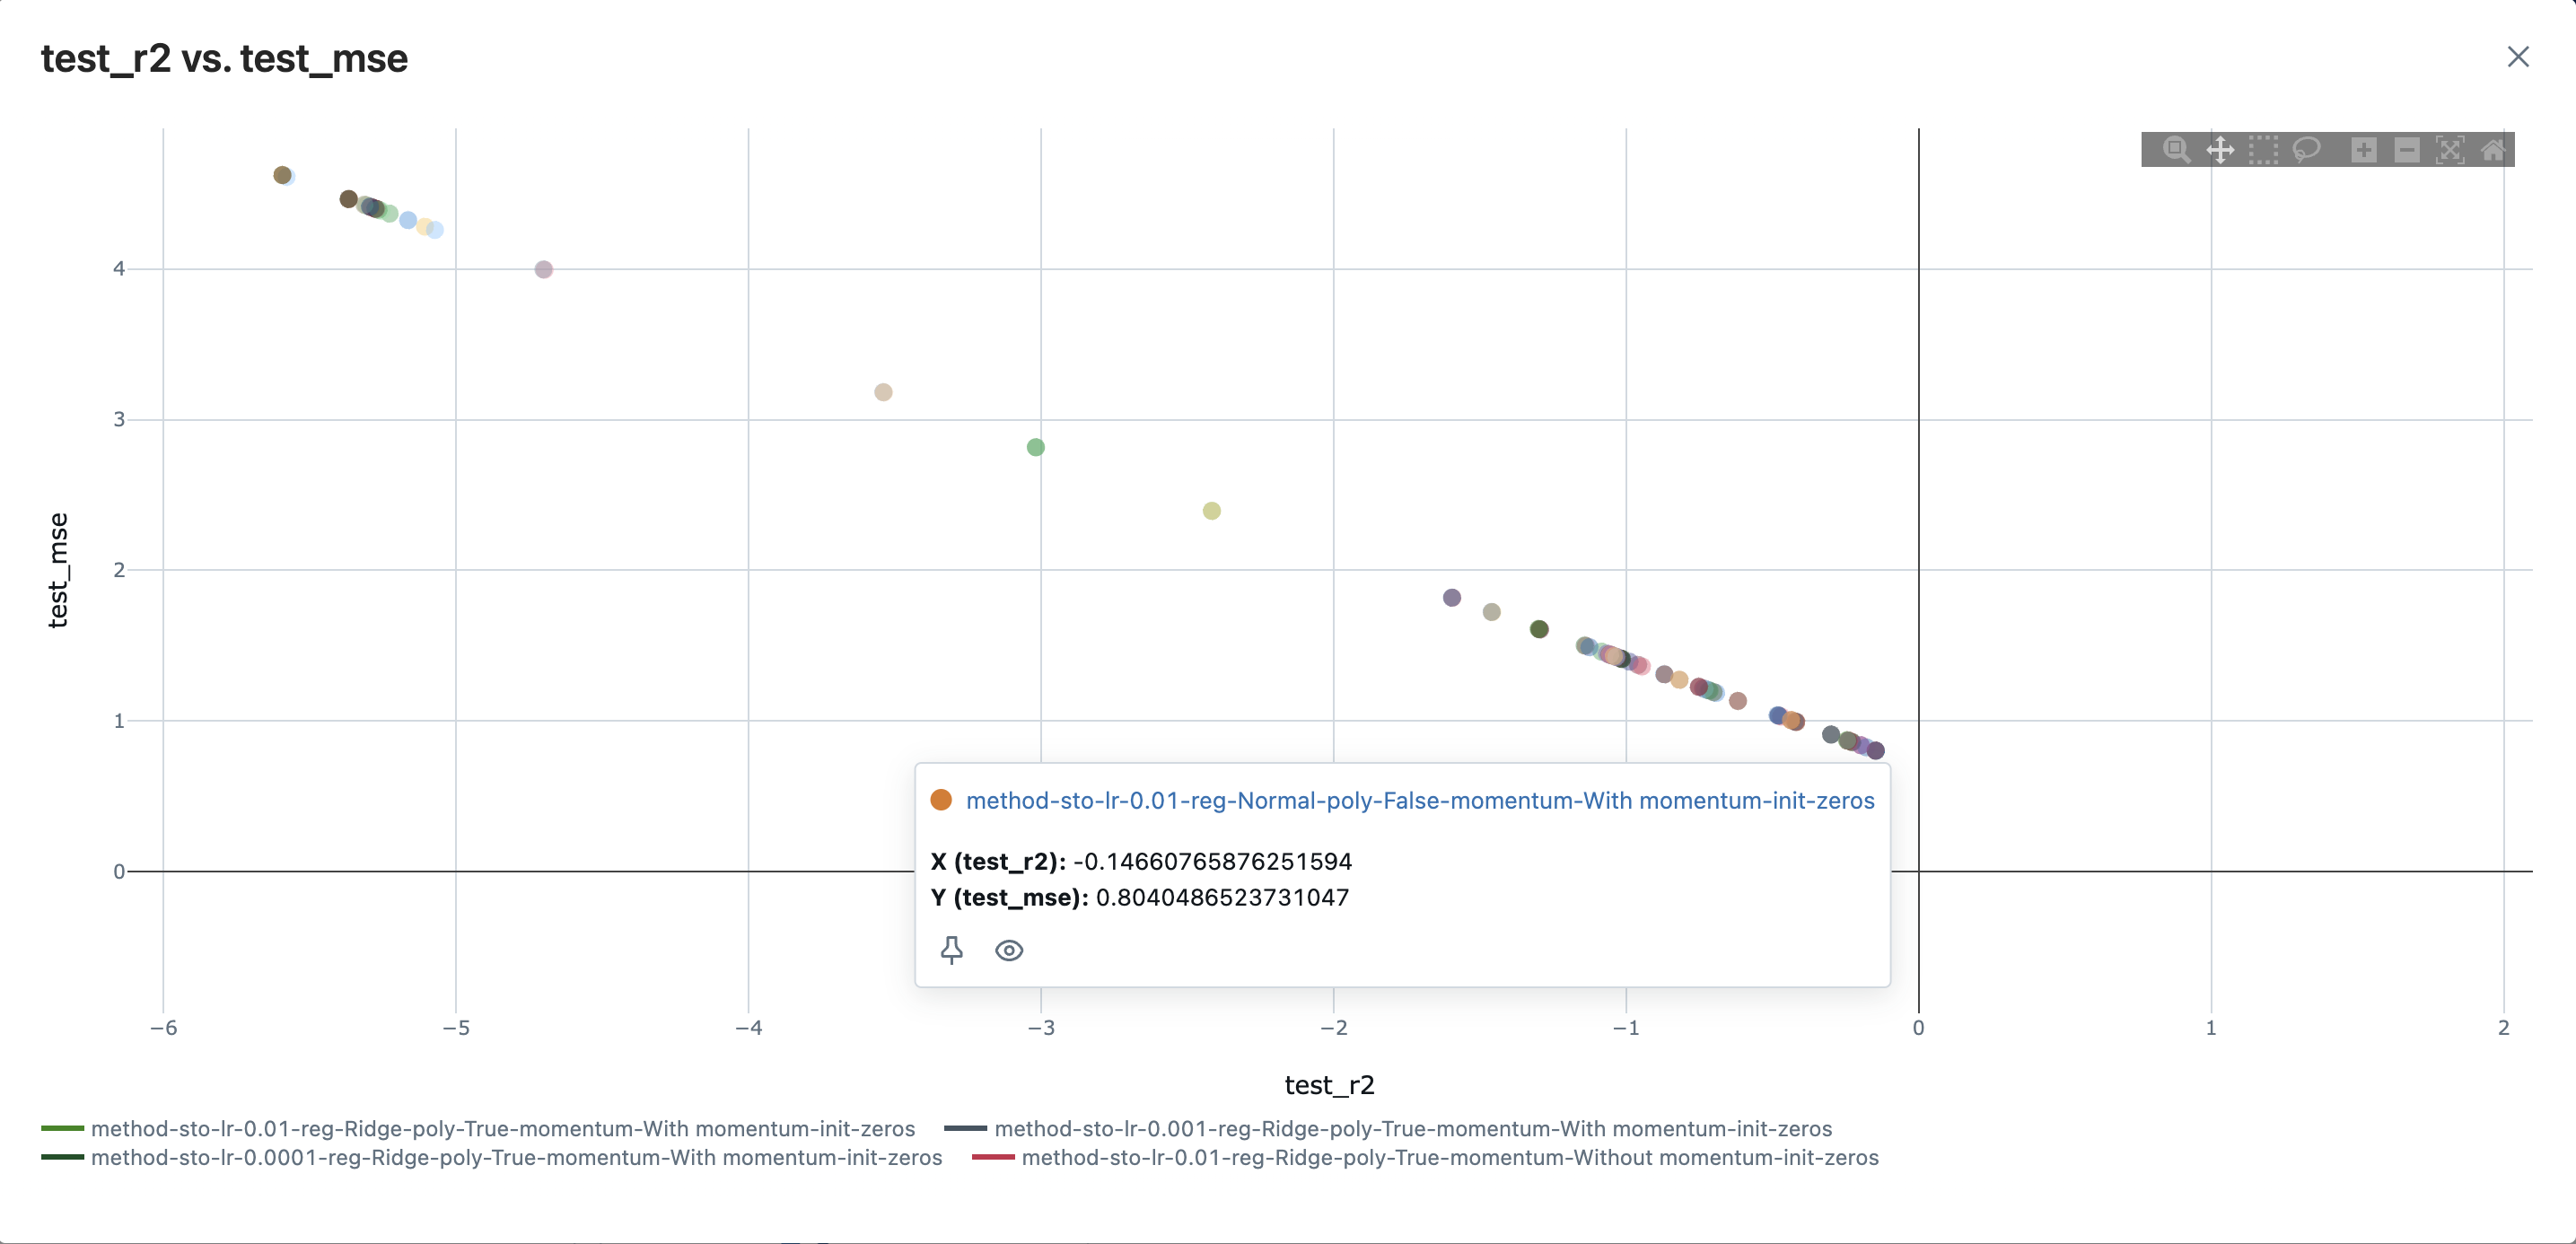

In [174]:
from IPython.display import Image

# Display image
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/testmse_vs_testr2.png')



From the scatter plot above, we can clearly see that the experiment with the parameters **method-sto-lr-0.01-reg-Normal-poly-False-momentum-With Momentum-init-zeros** gives the best result with **test_mse**: 0.8040486523731047 and **test_r2**: -0.14660765876251594.

Furthermore, among the different learning rates (0.01, 0.001, and 0.0001), the learning rate of 0.01 performed best. This learning rate might have been effective for reasons such as its convergence rate, mitigating local minima, reducing gradient noise, and data scaling. This can be observed in the figures below of the best experiment observed.

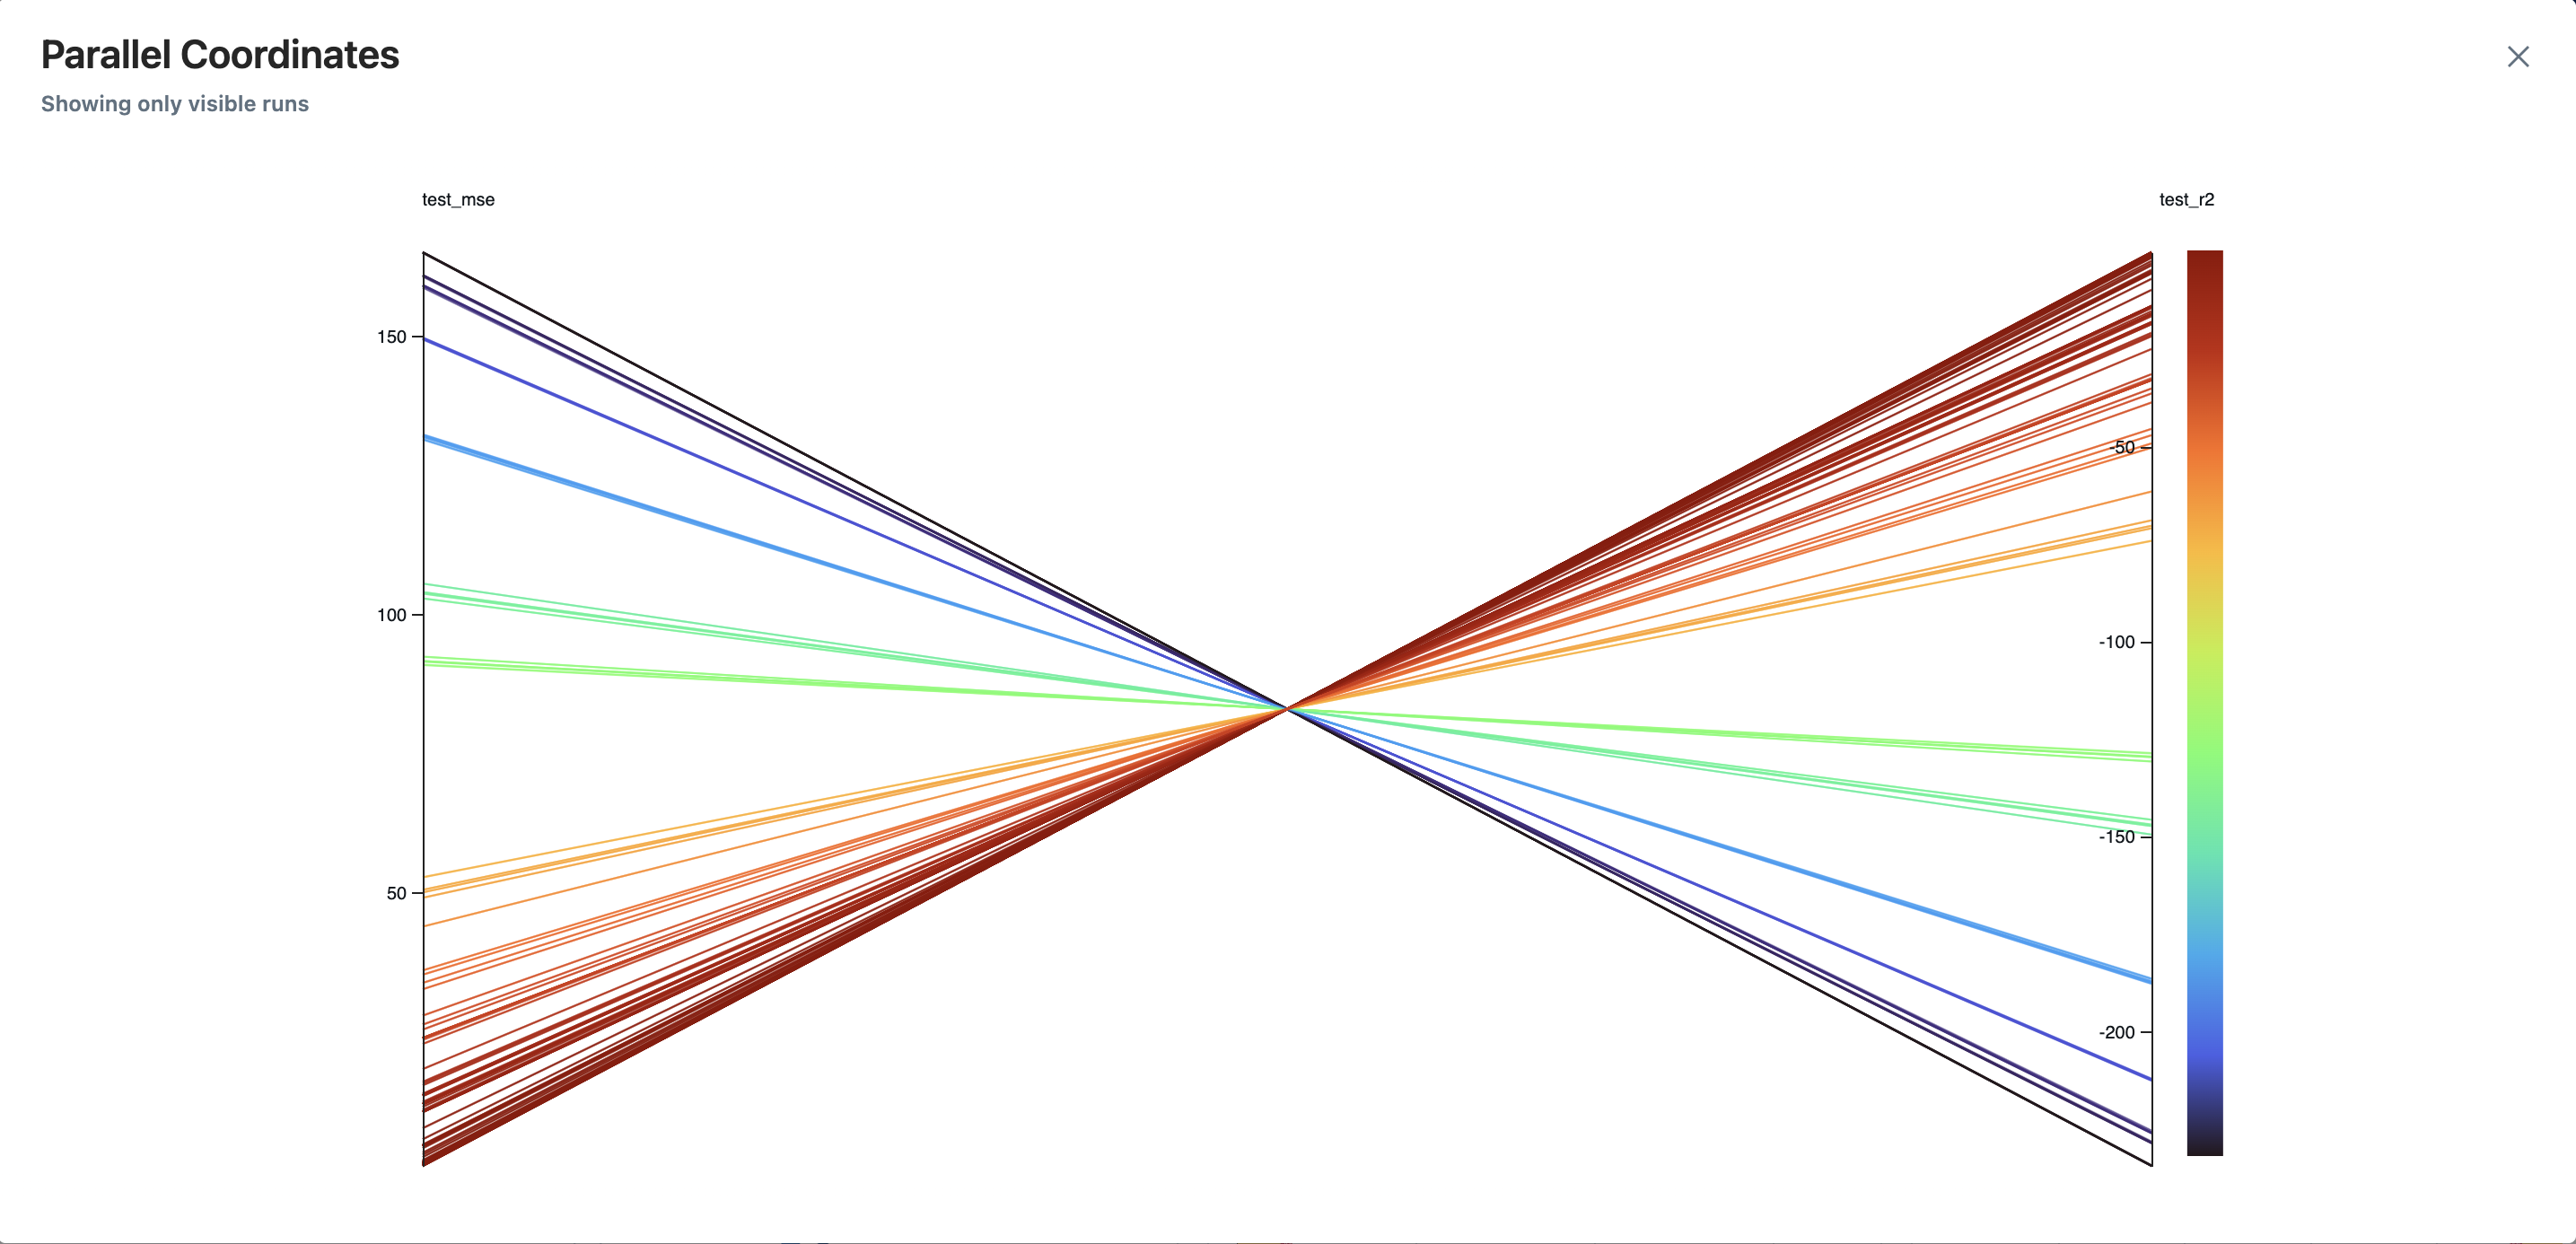

In [175]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/parallel.png')


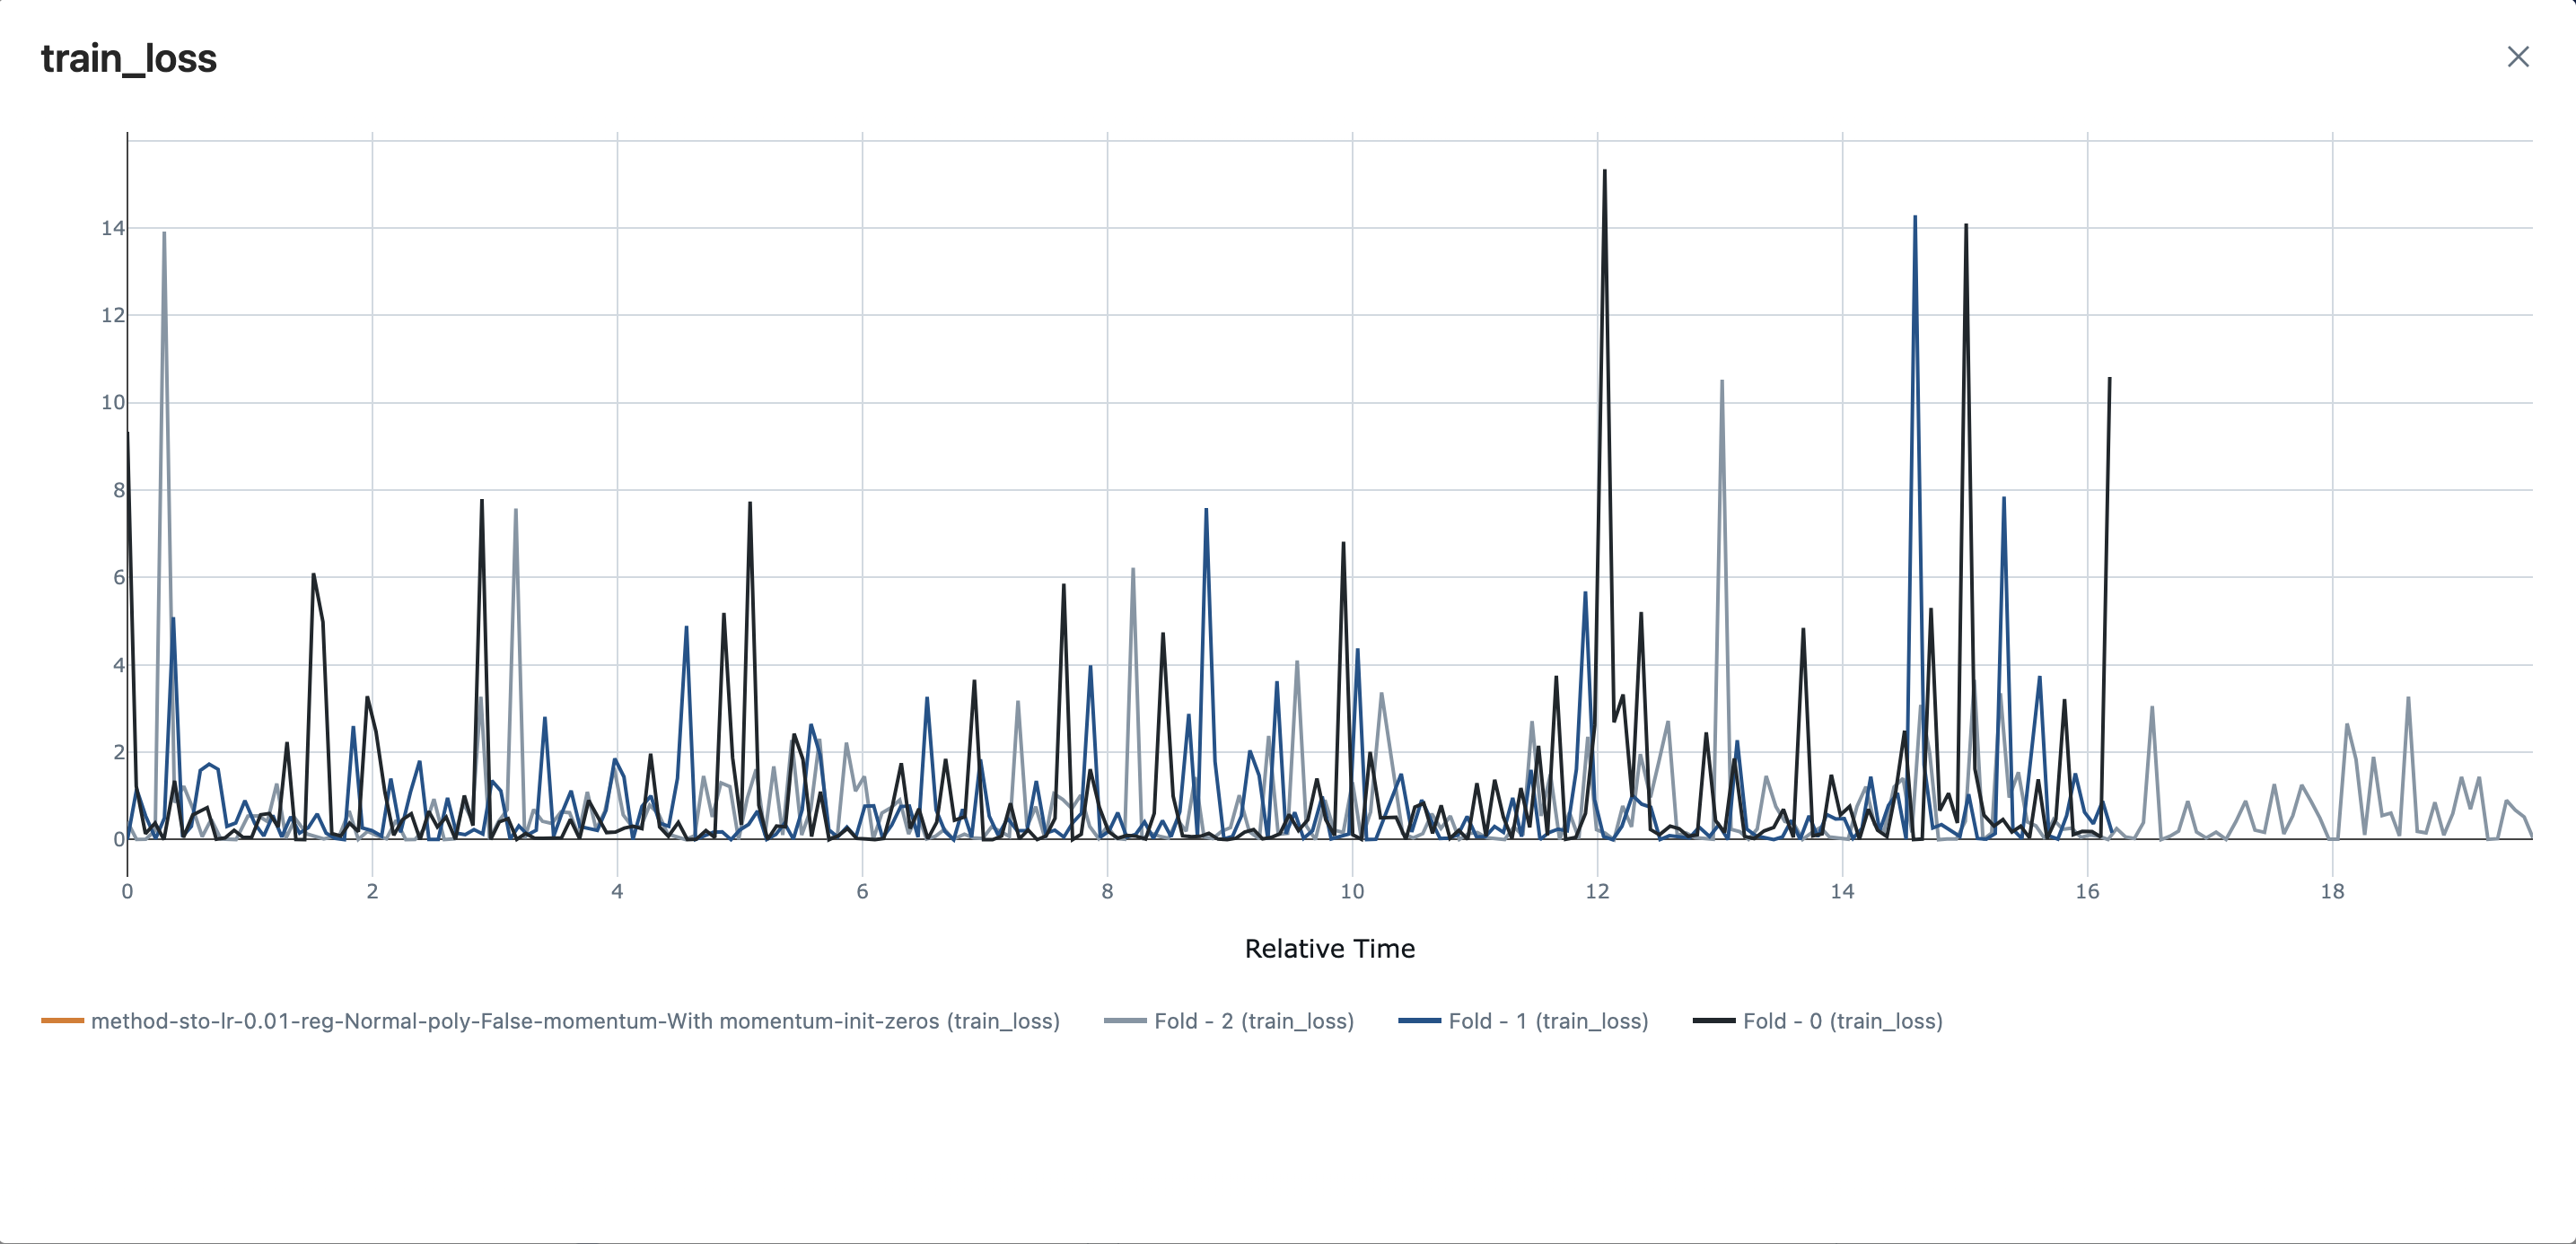

In [176]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/train_loss_meth.png')

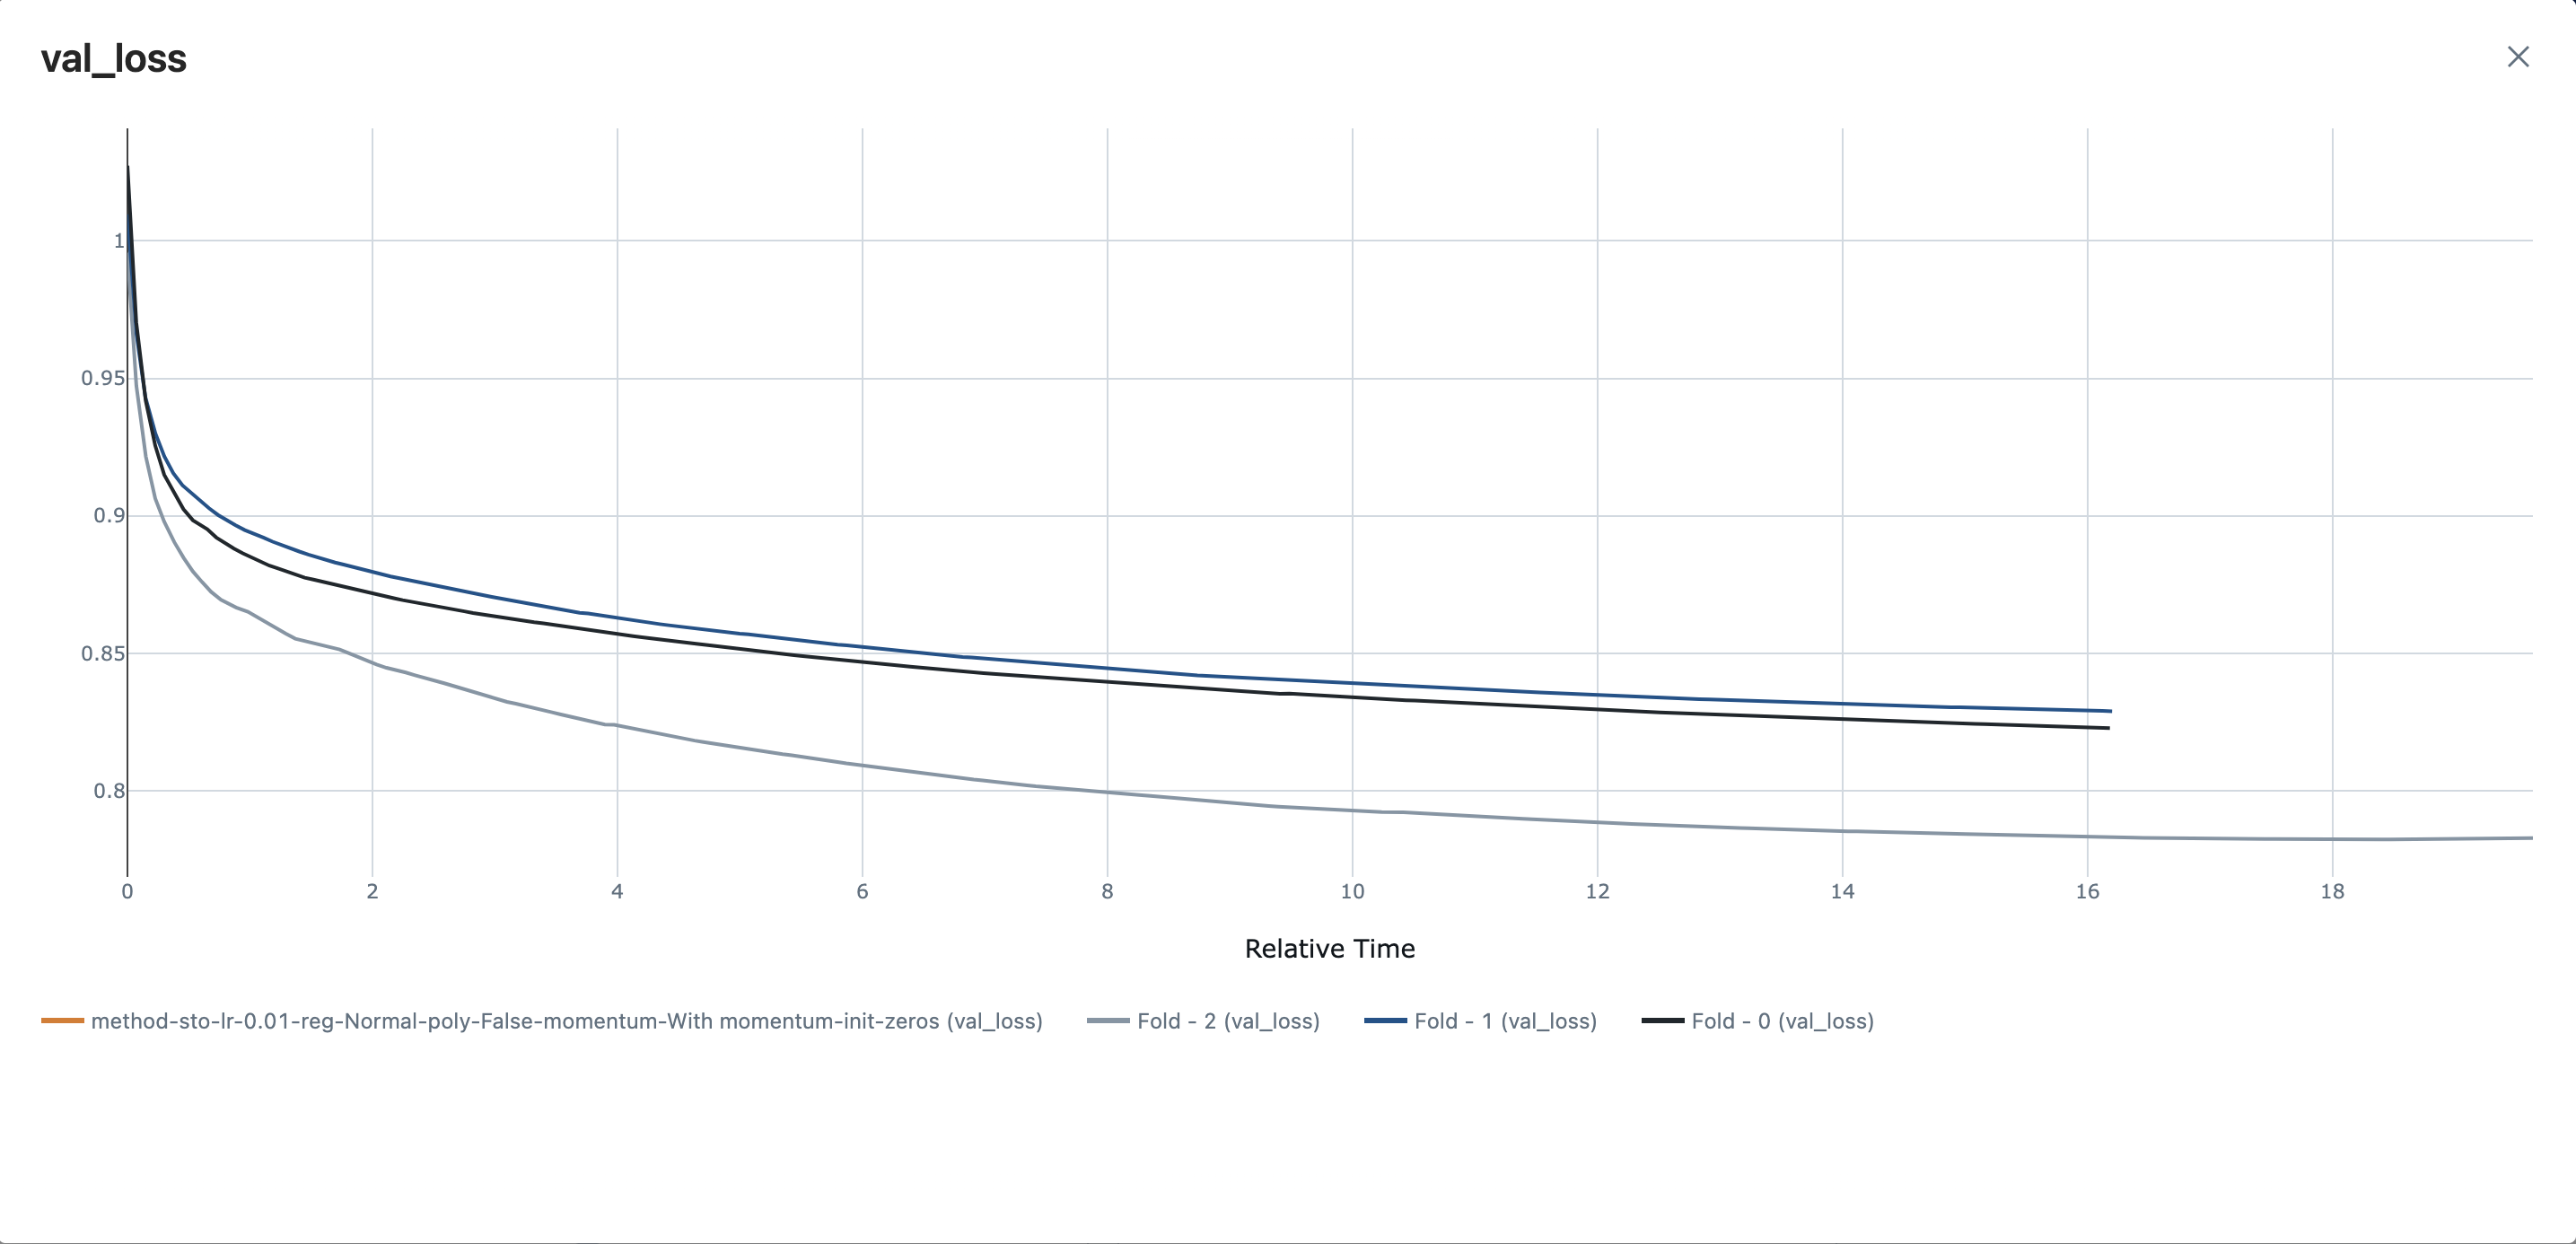

In [177]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/val_loss_meth.png')

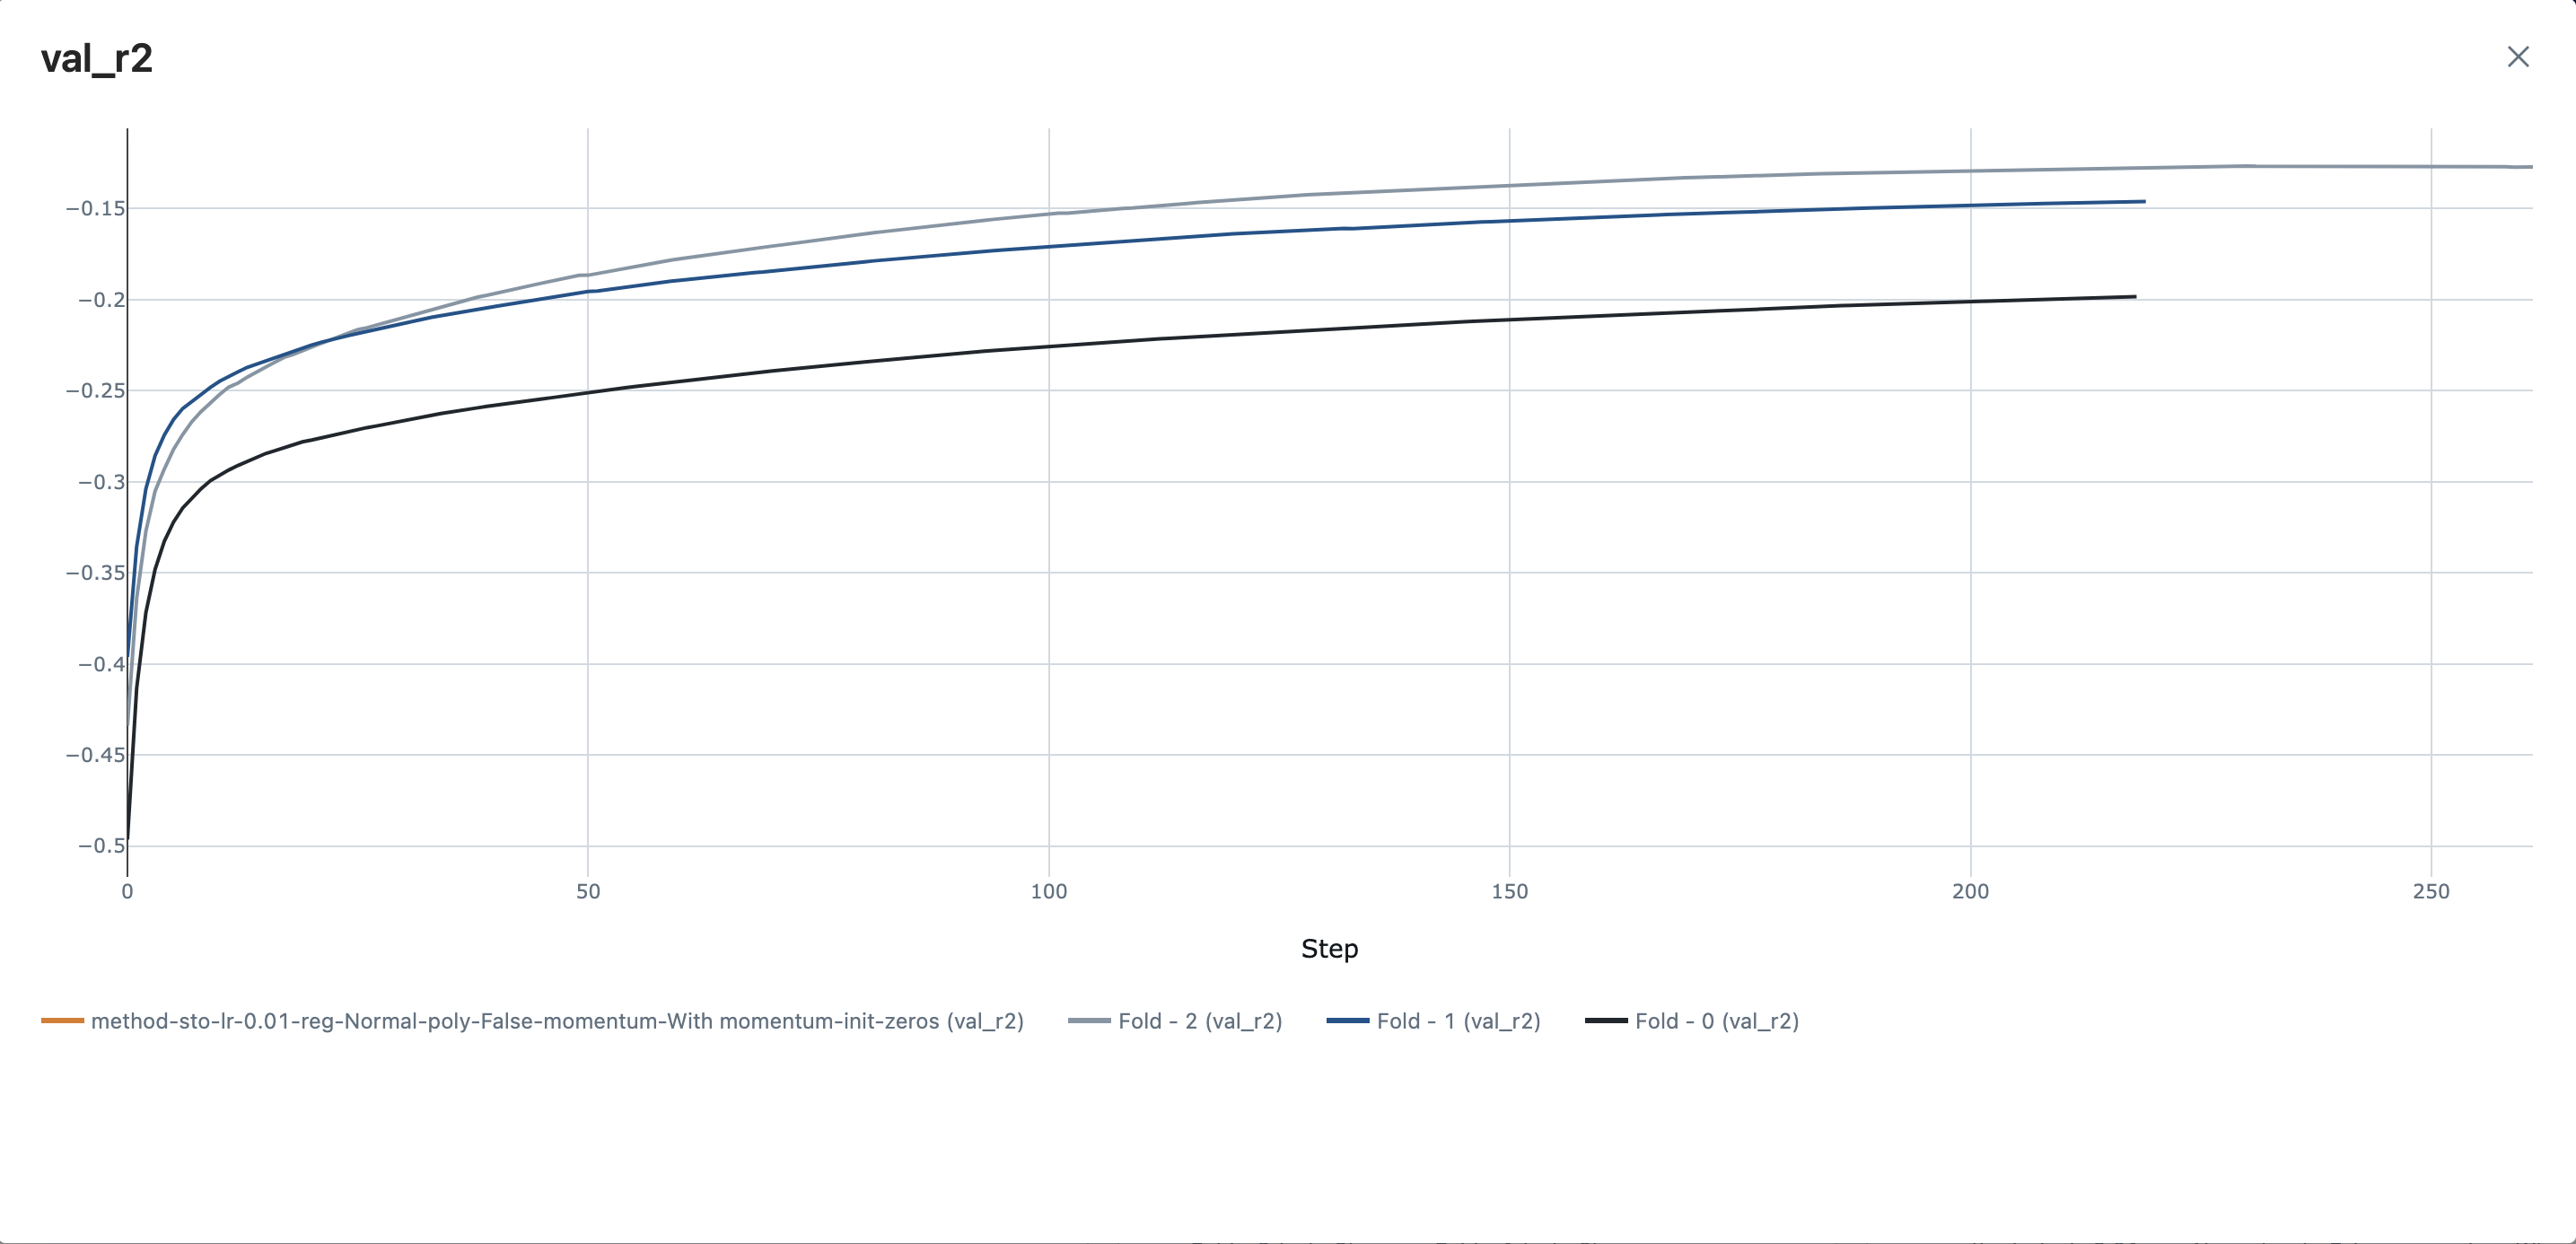

In [178]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/val_r2_meth.png')

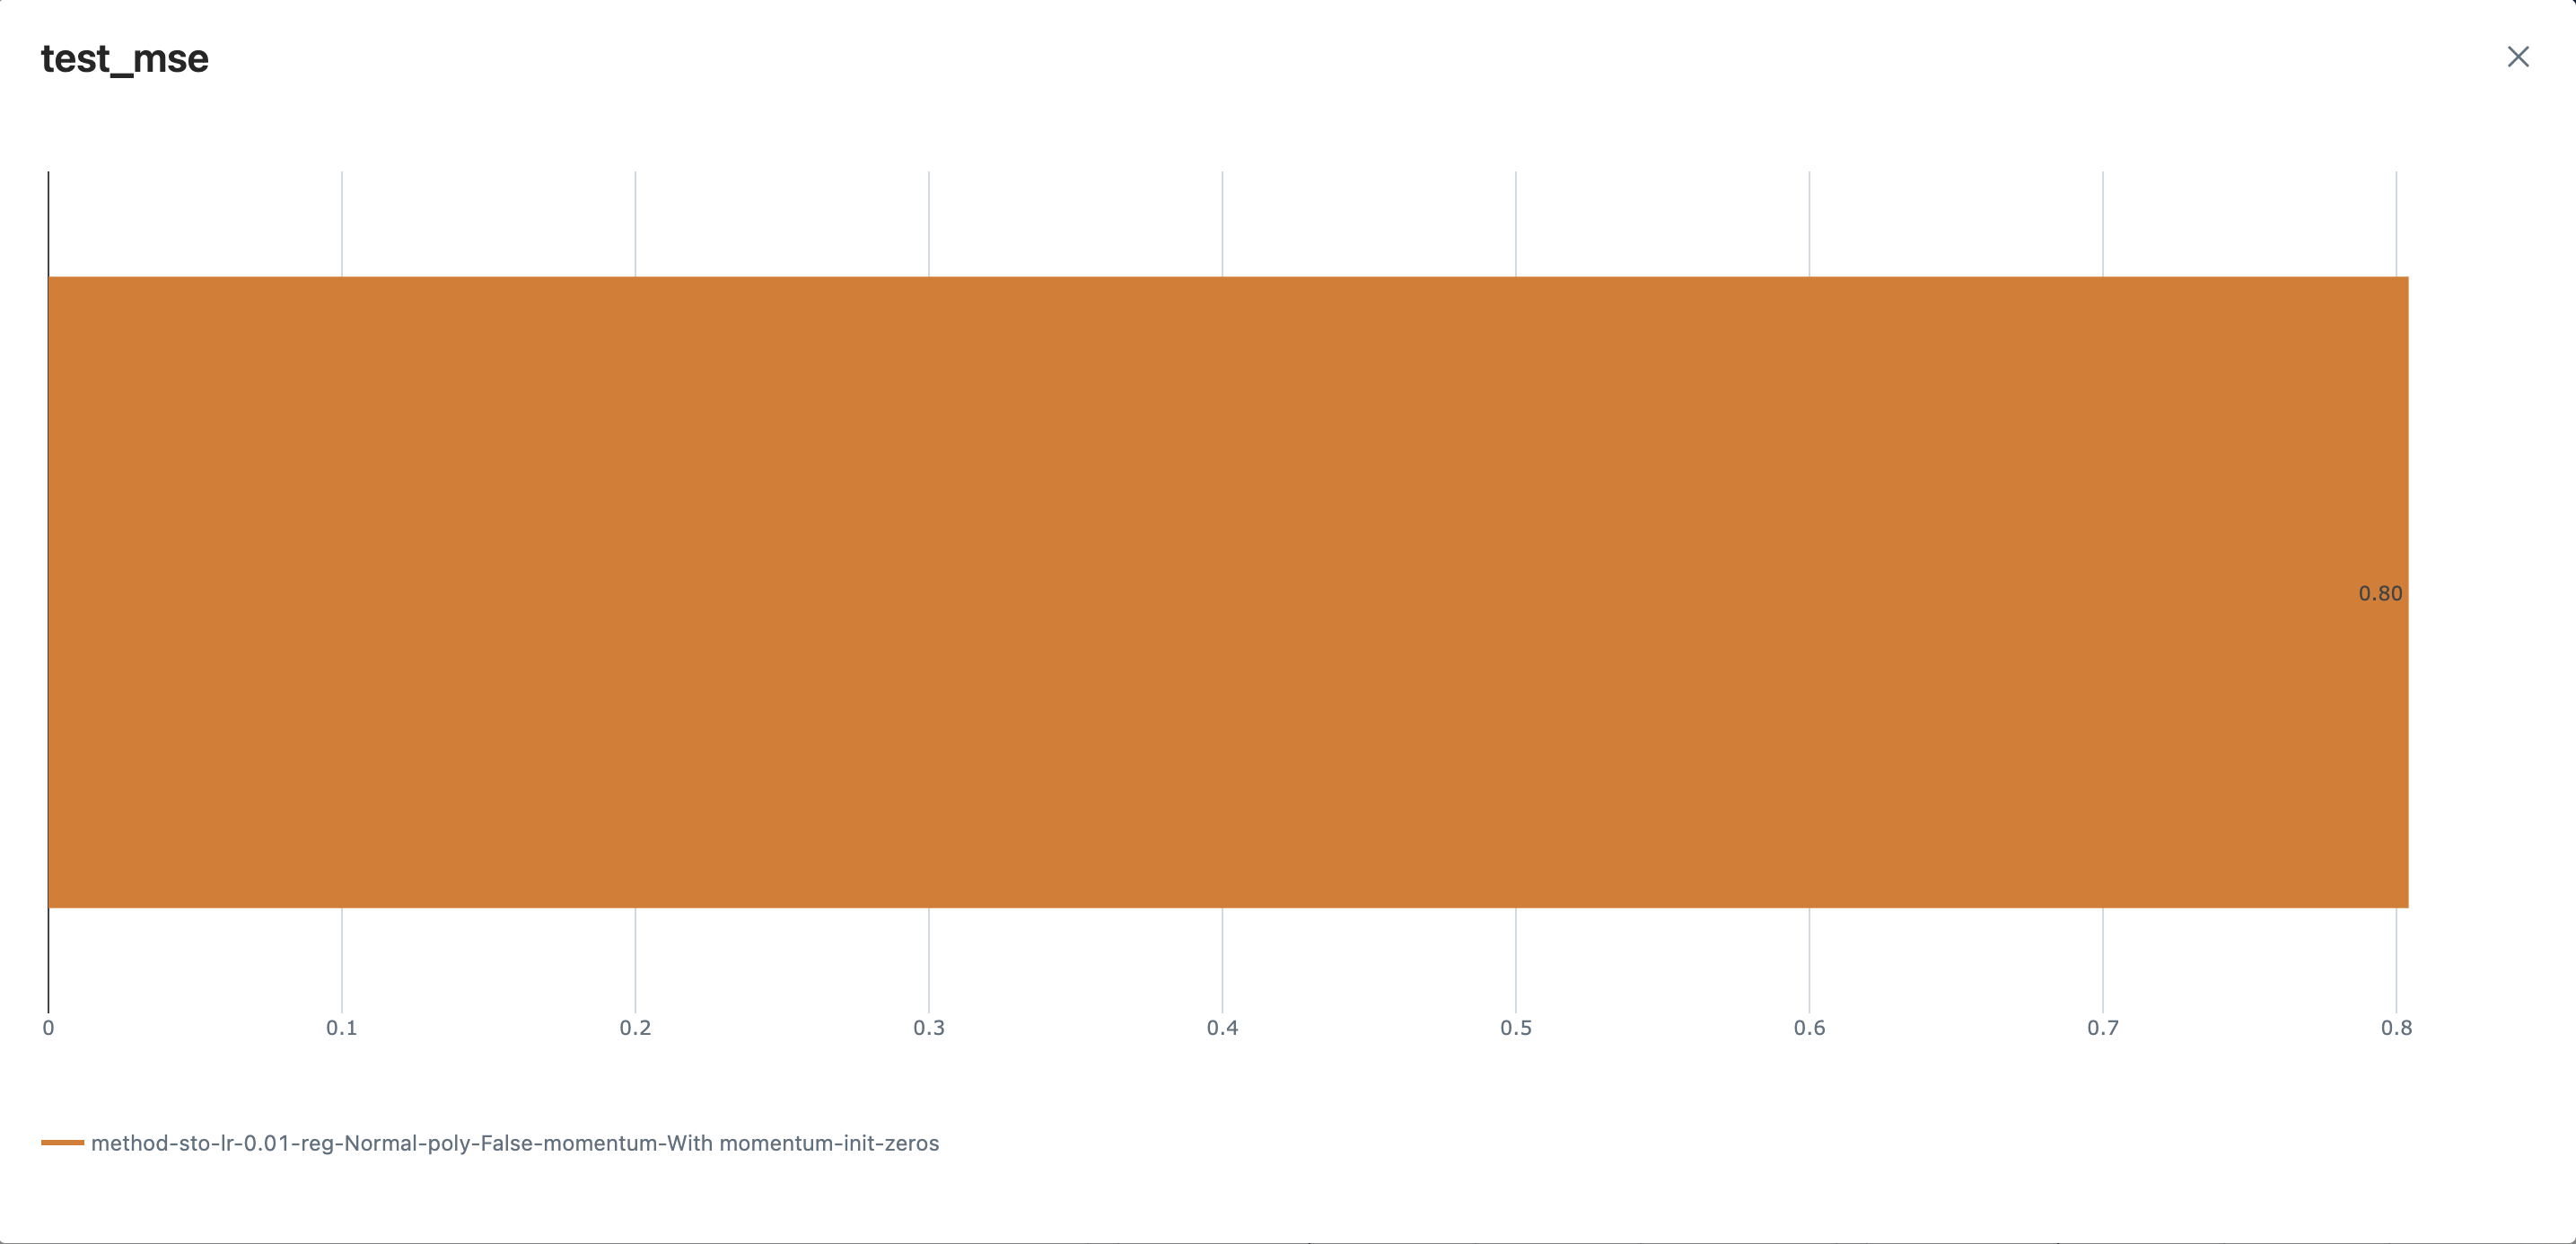

In [179]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/mse_meth.png')

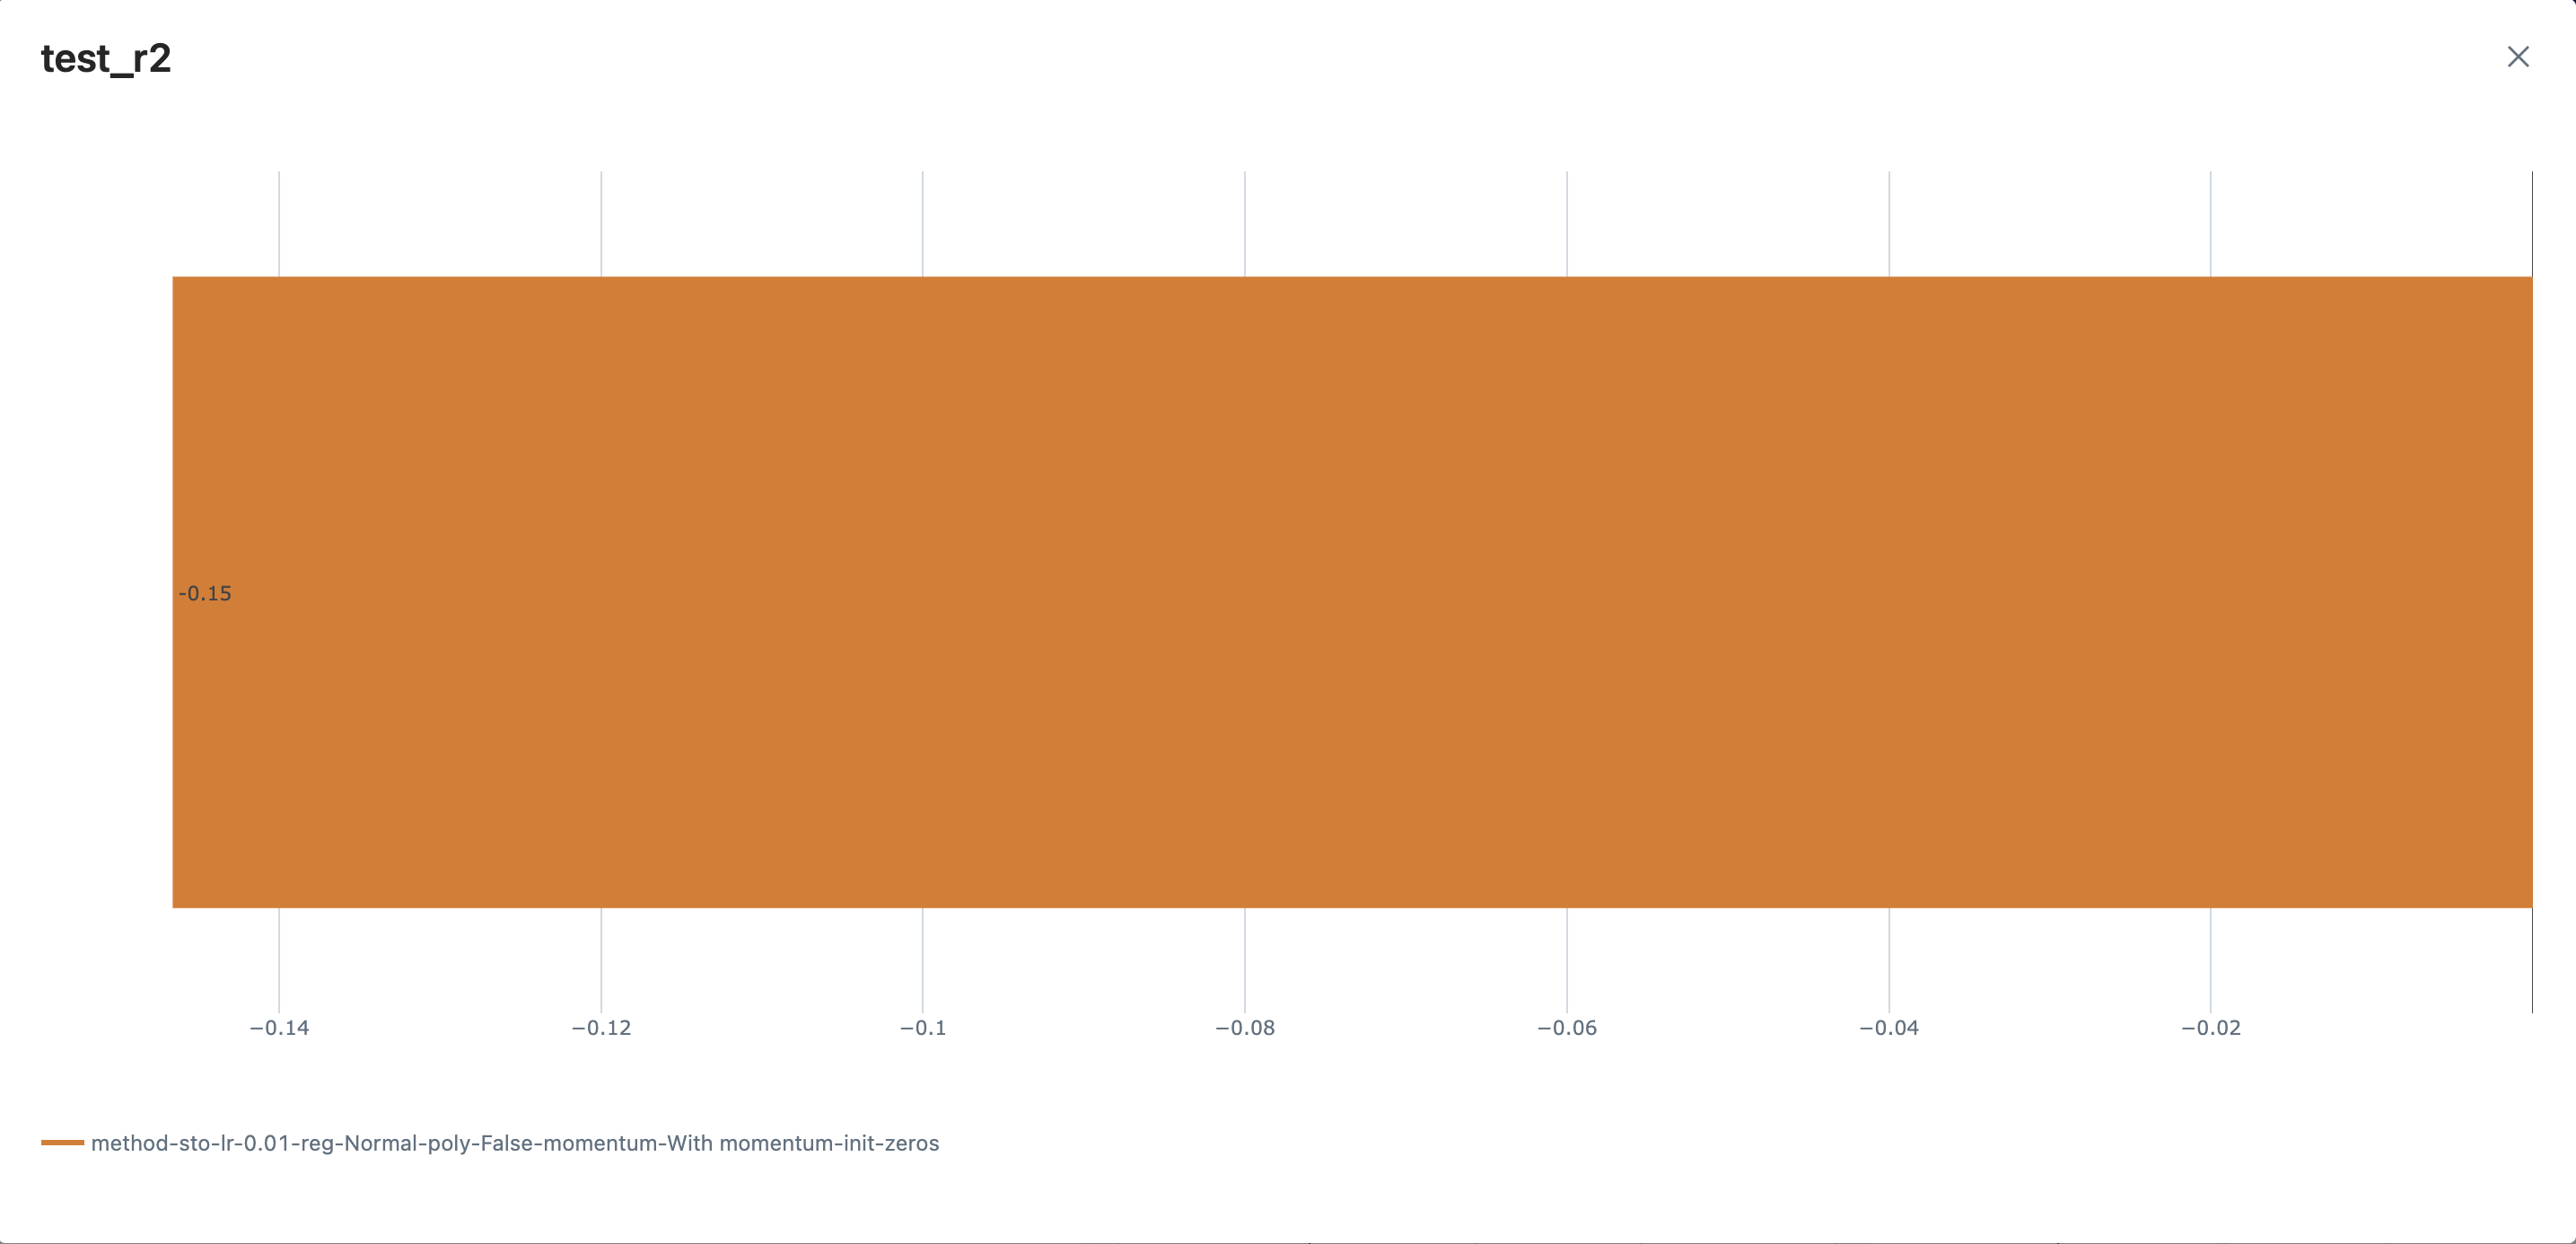

In [180]:
Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/r2_meth.png')

Additionally, with the finding of the best parameters, we tested the same with the testing dataset. We observed the following when logging its output to MLflow: **MSE: 0.847533356543526, and R²: 0.594824919362688**.

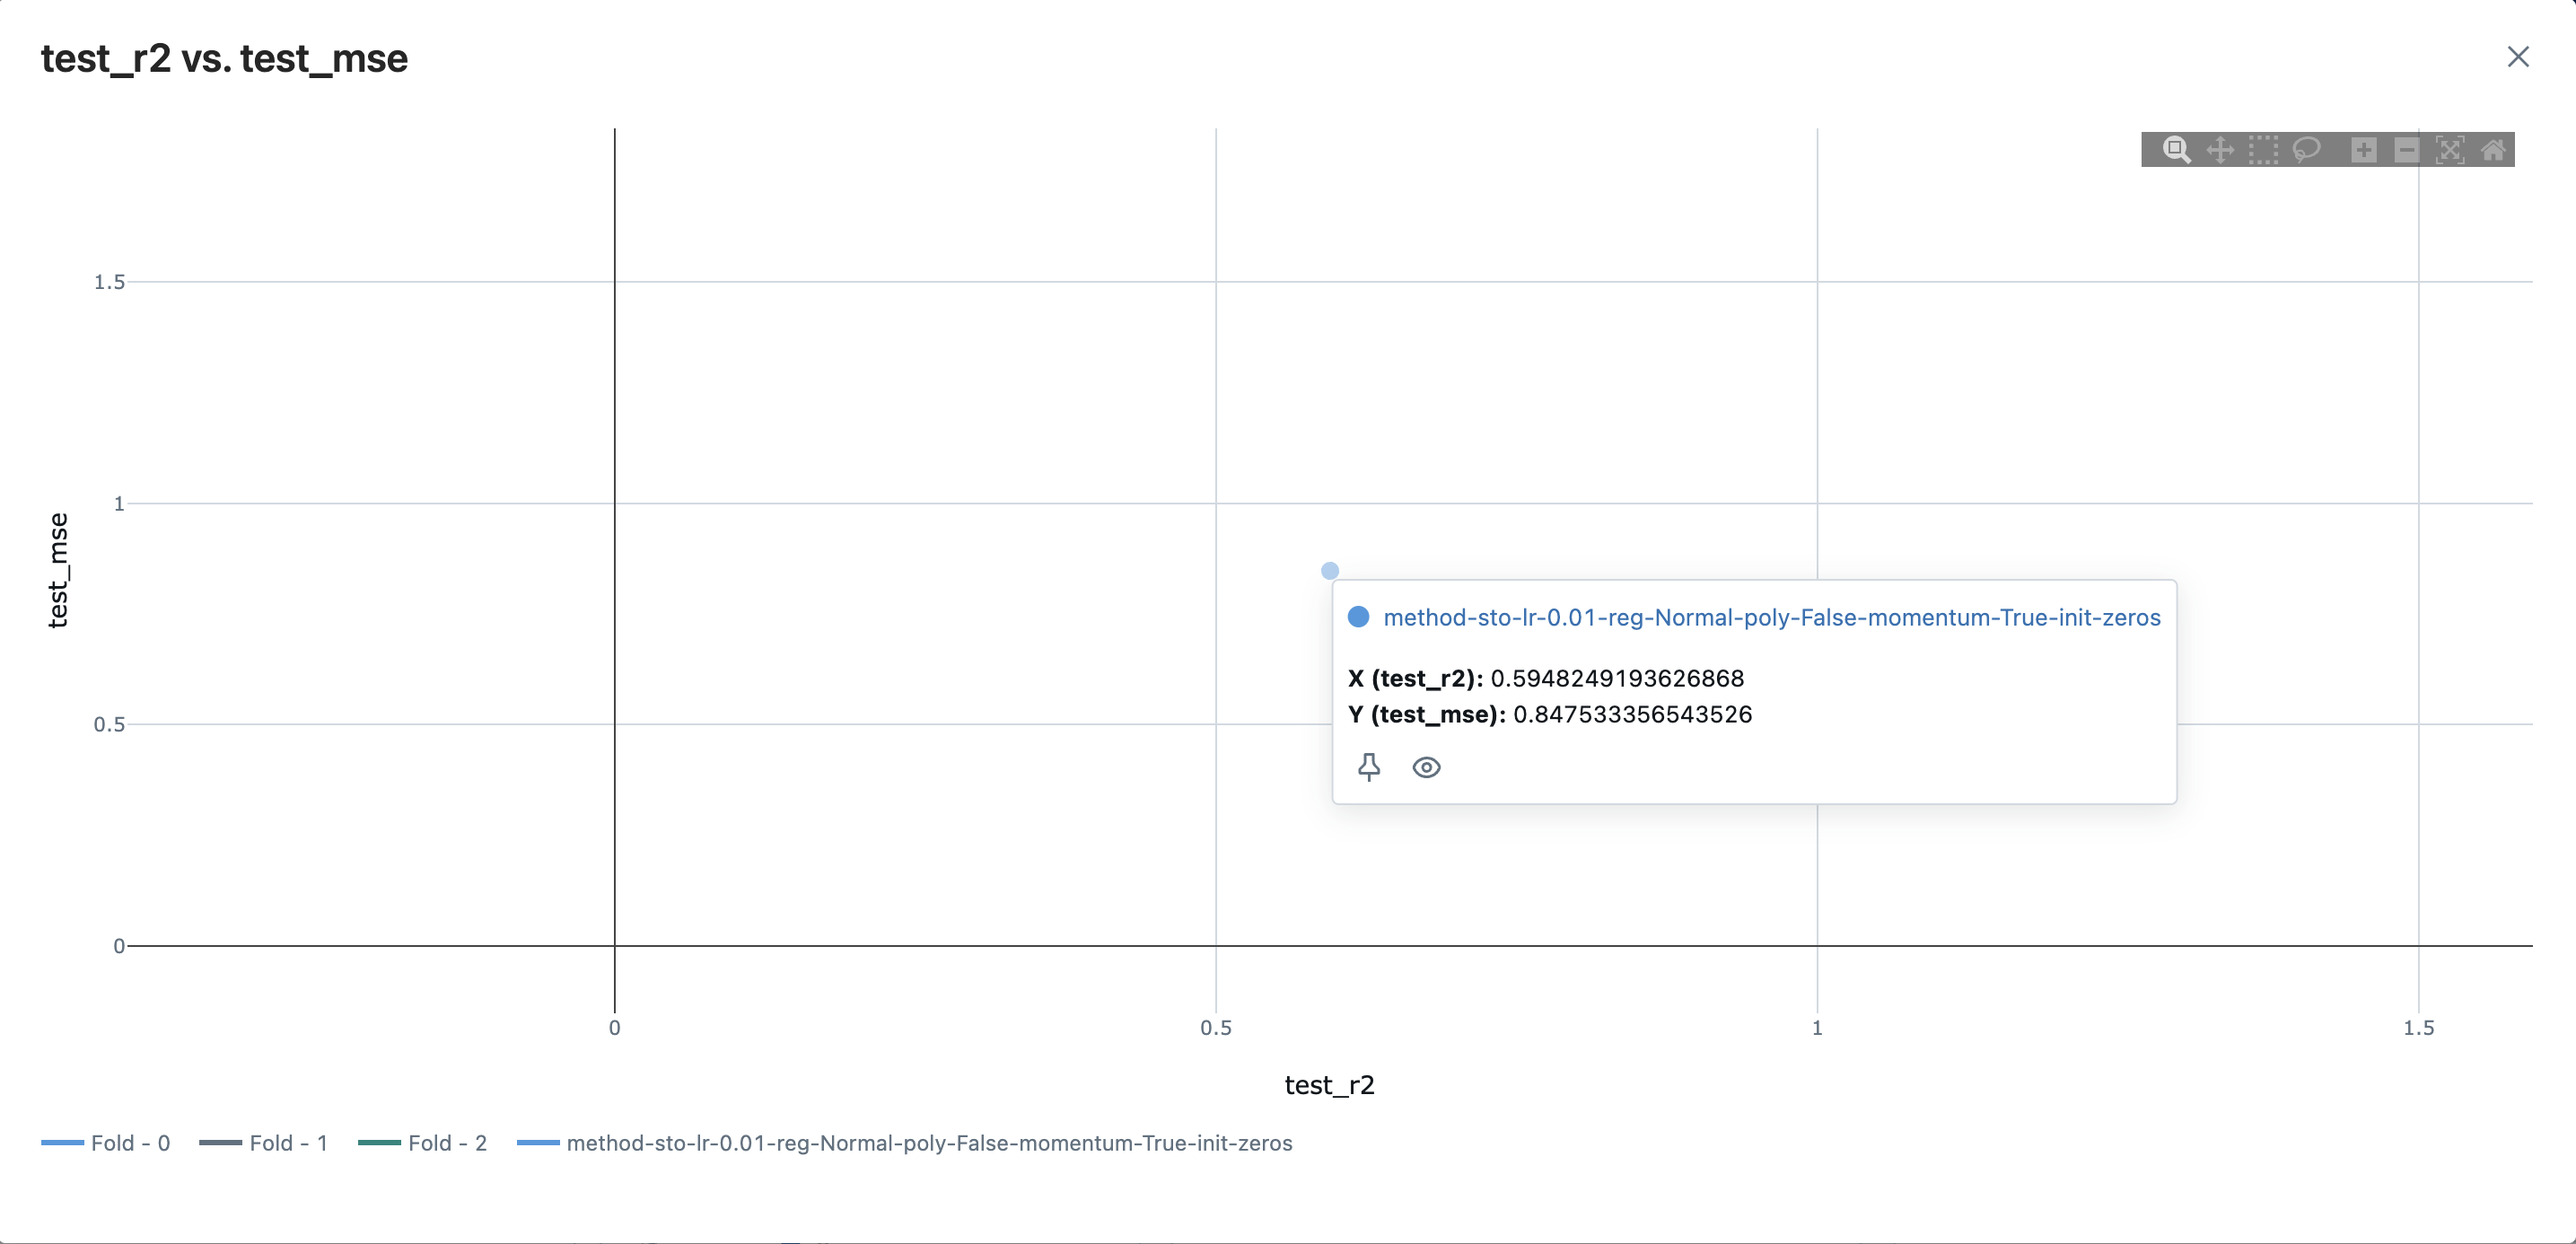

In [181]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_scatter.png')


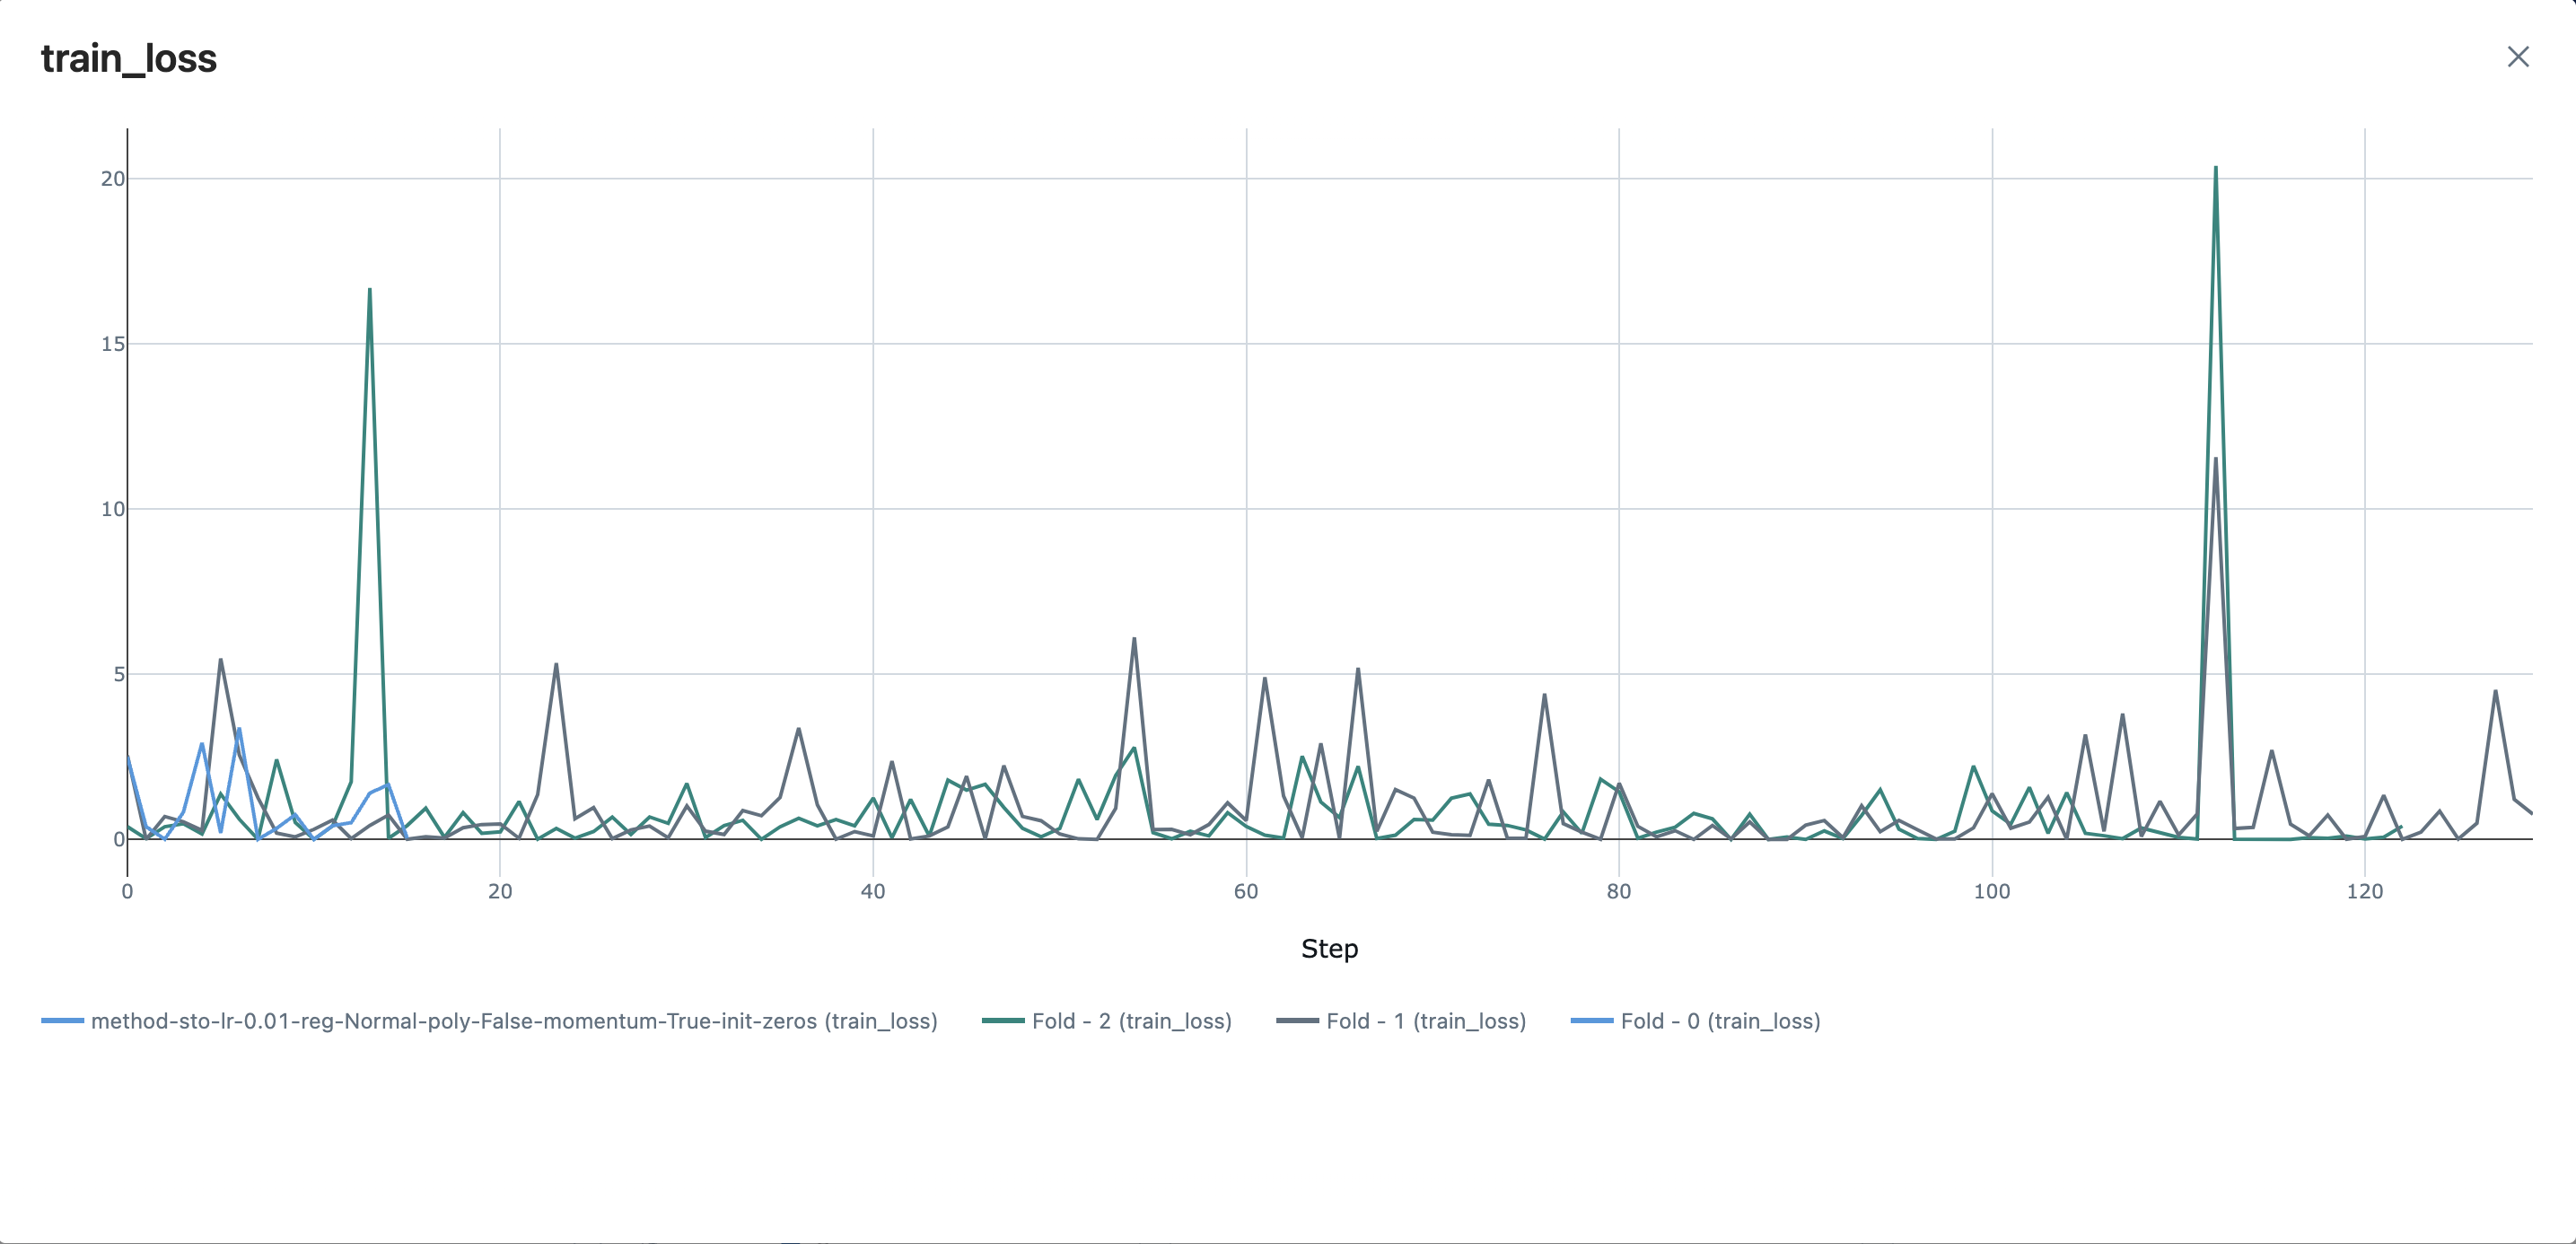

In [182]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_train.png')


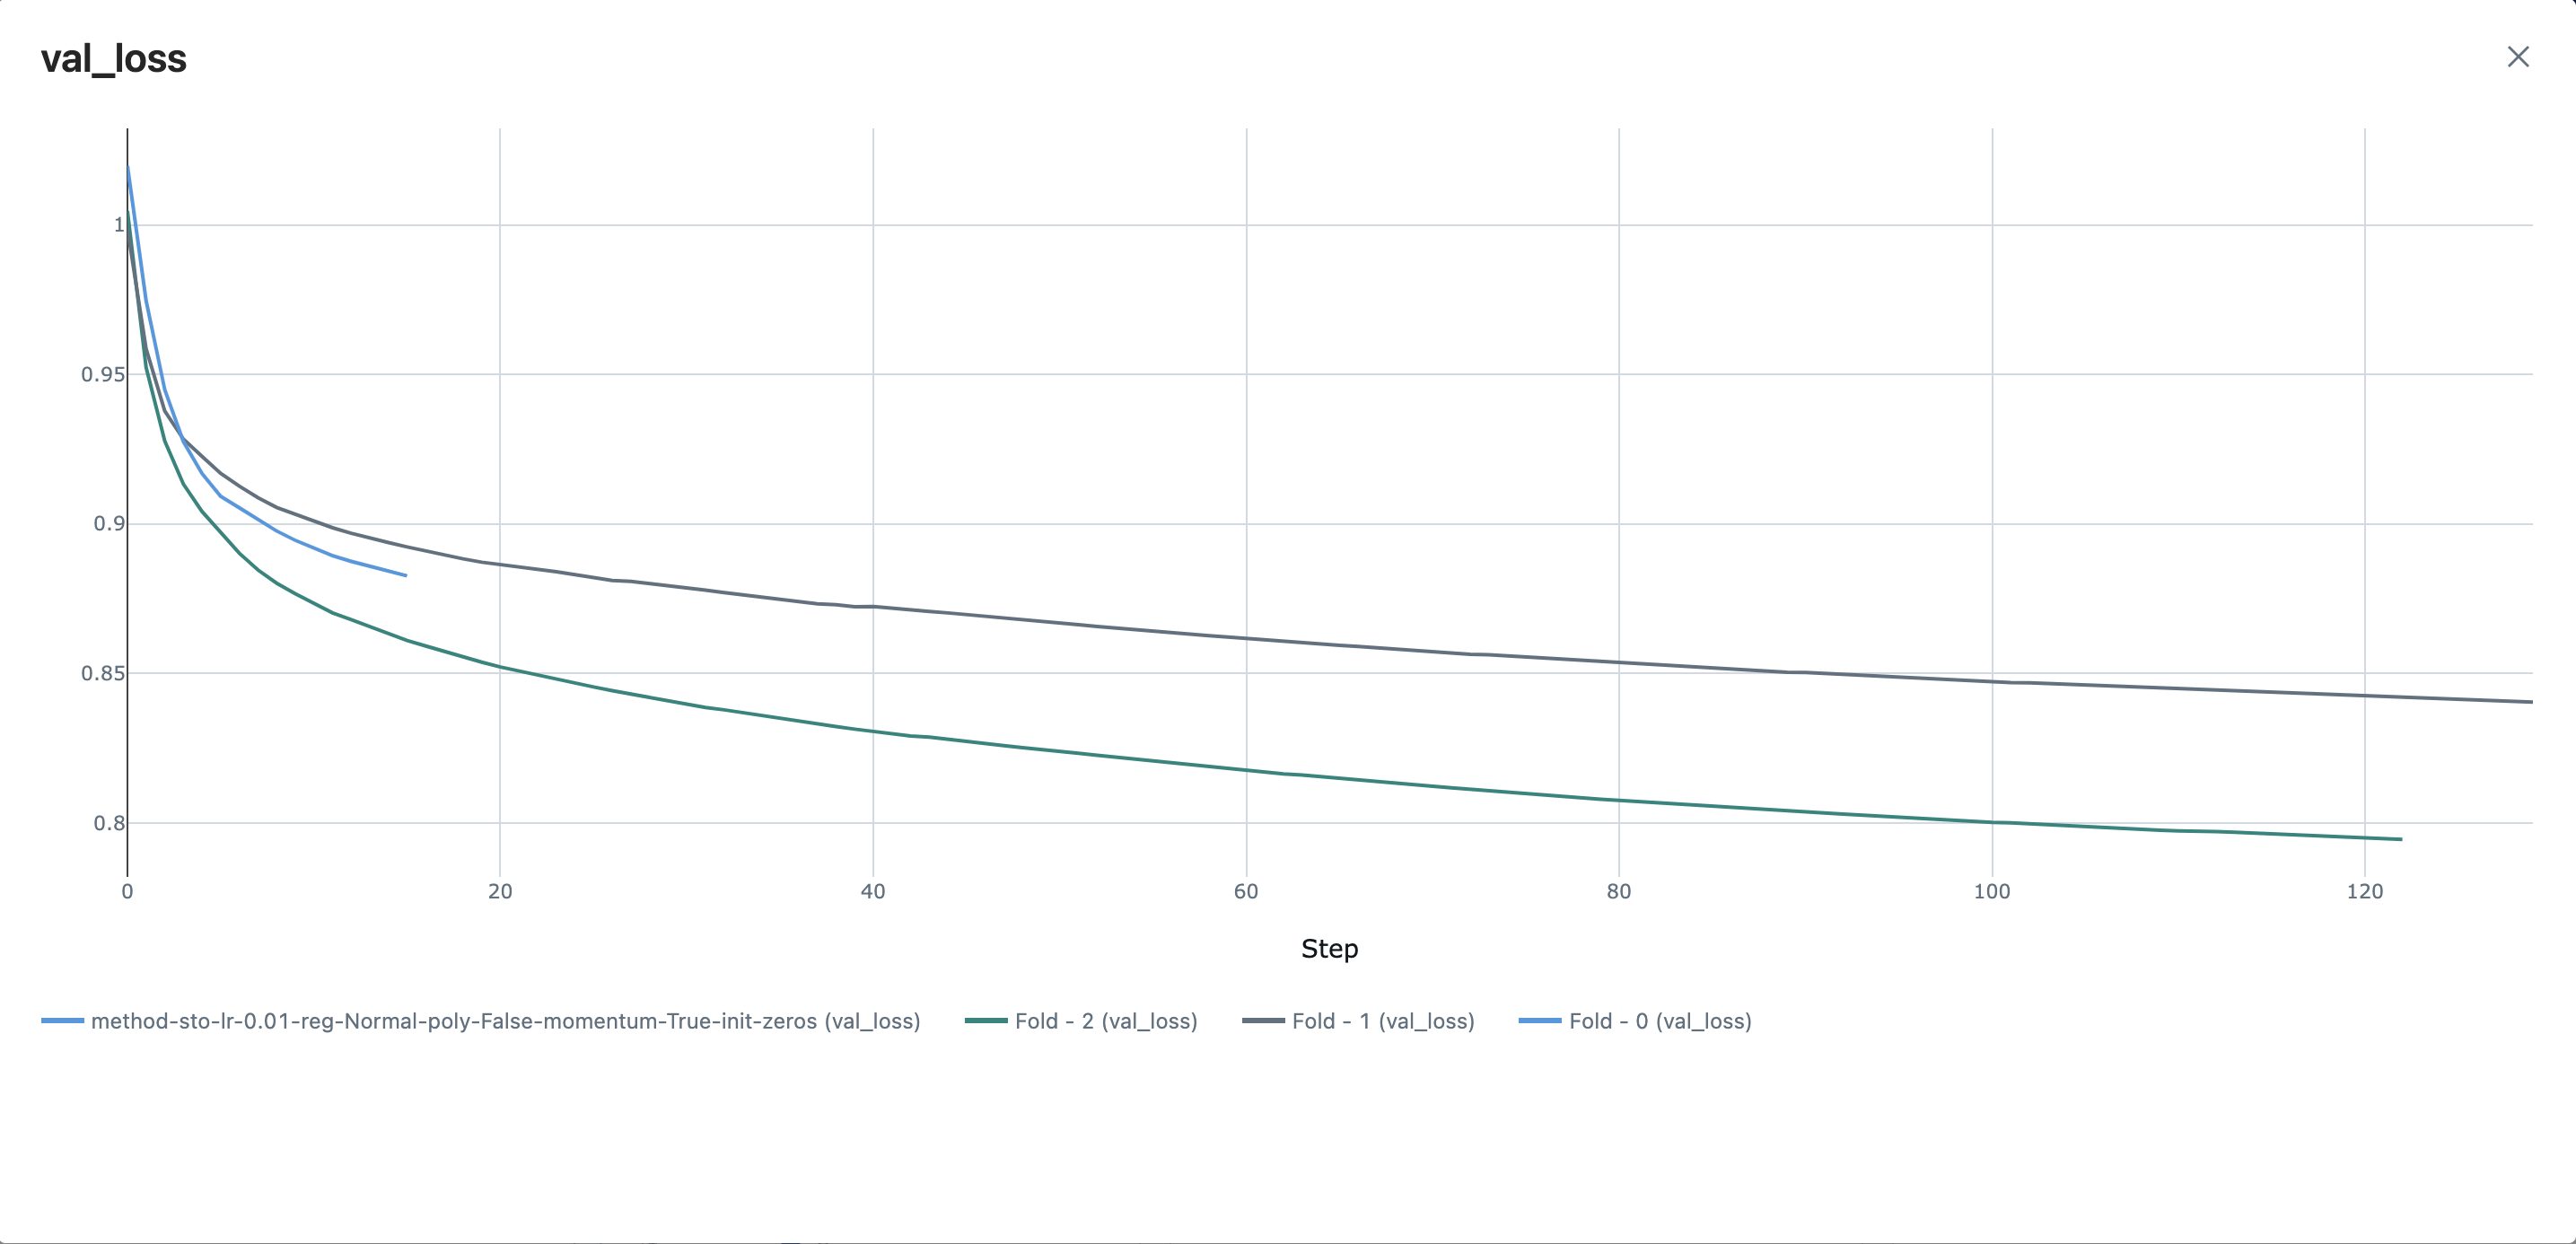

In [183]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_val_loss.png')


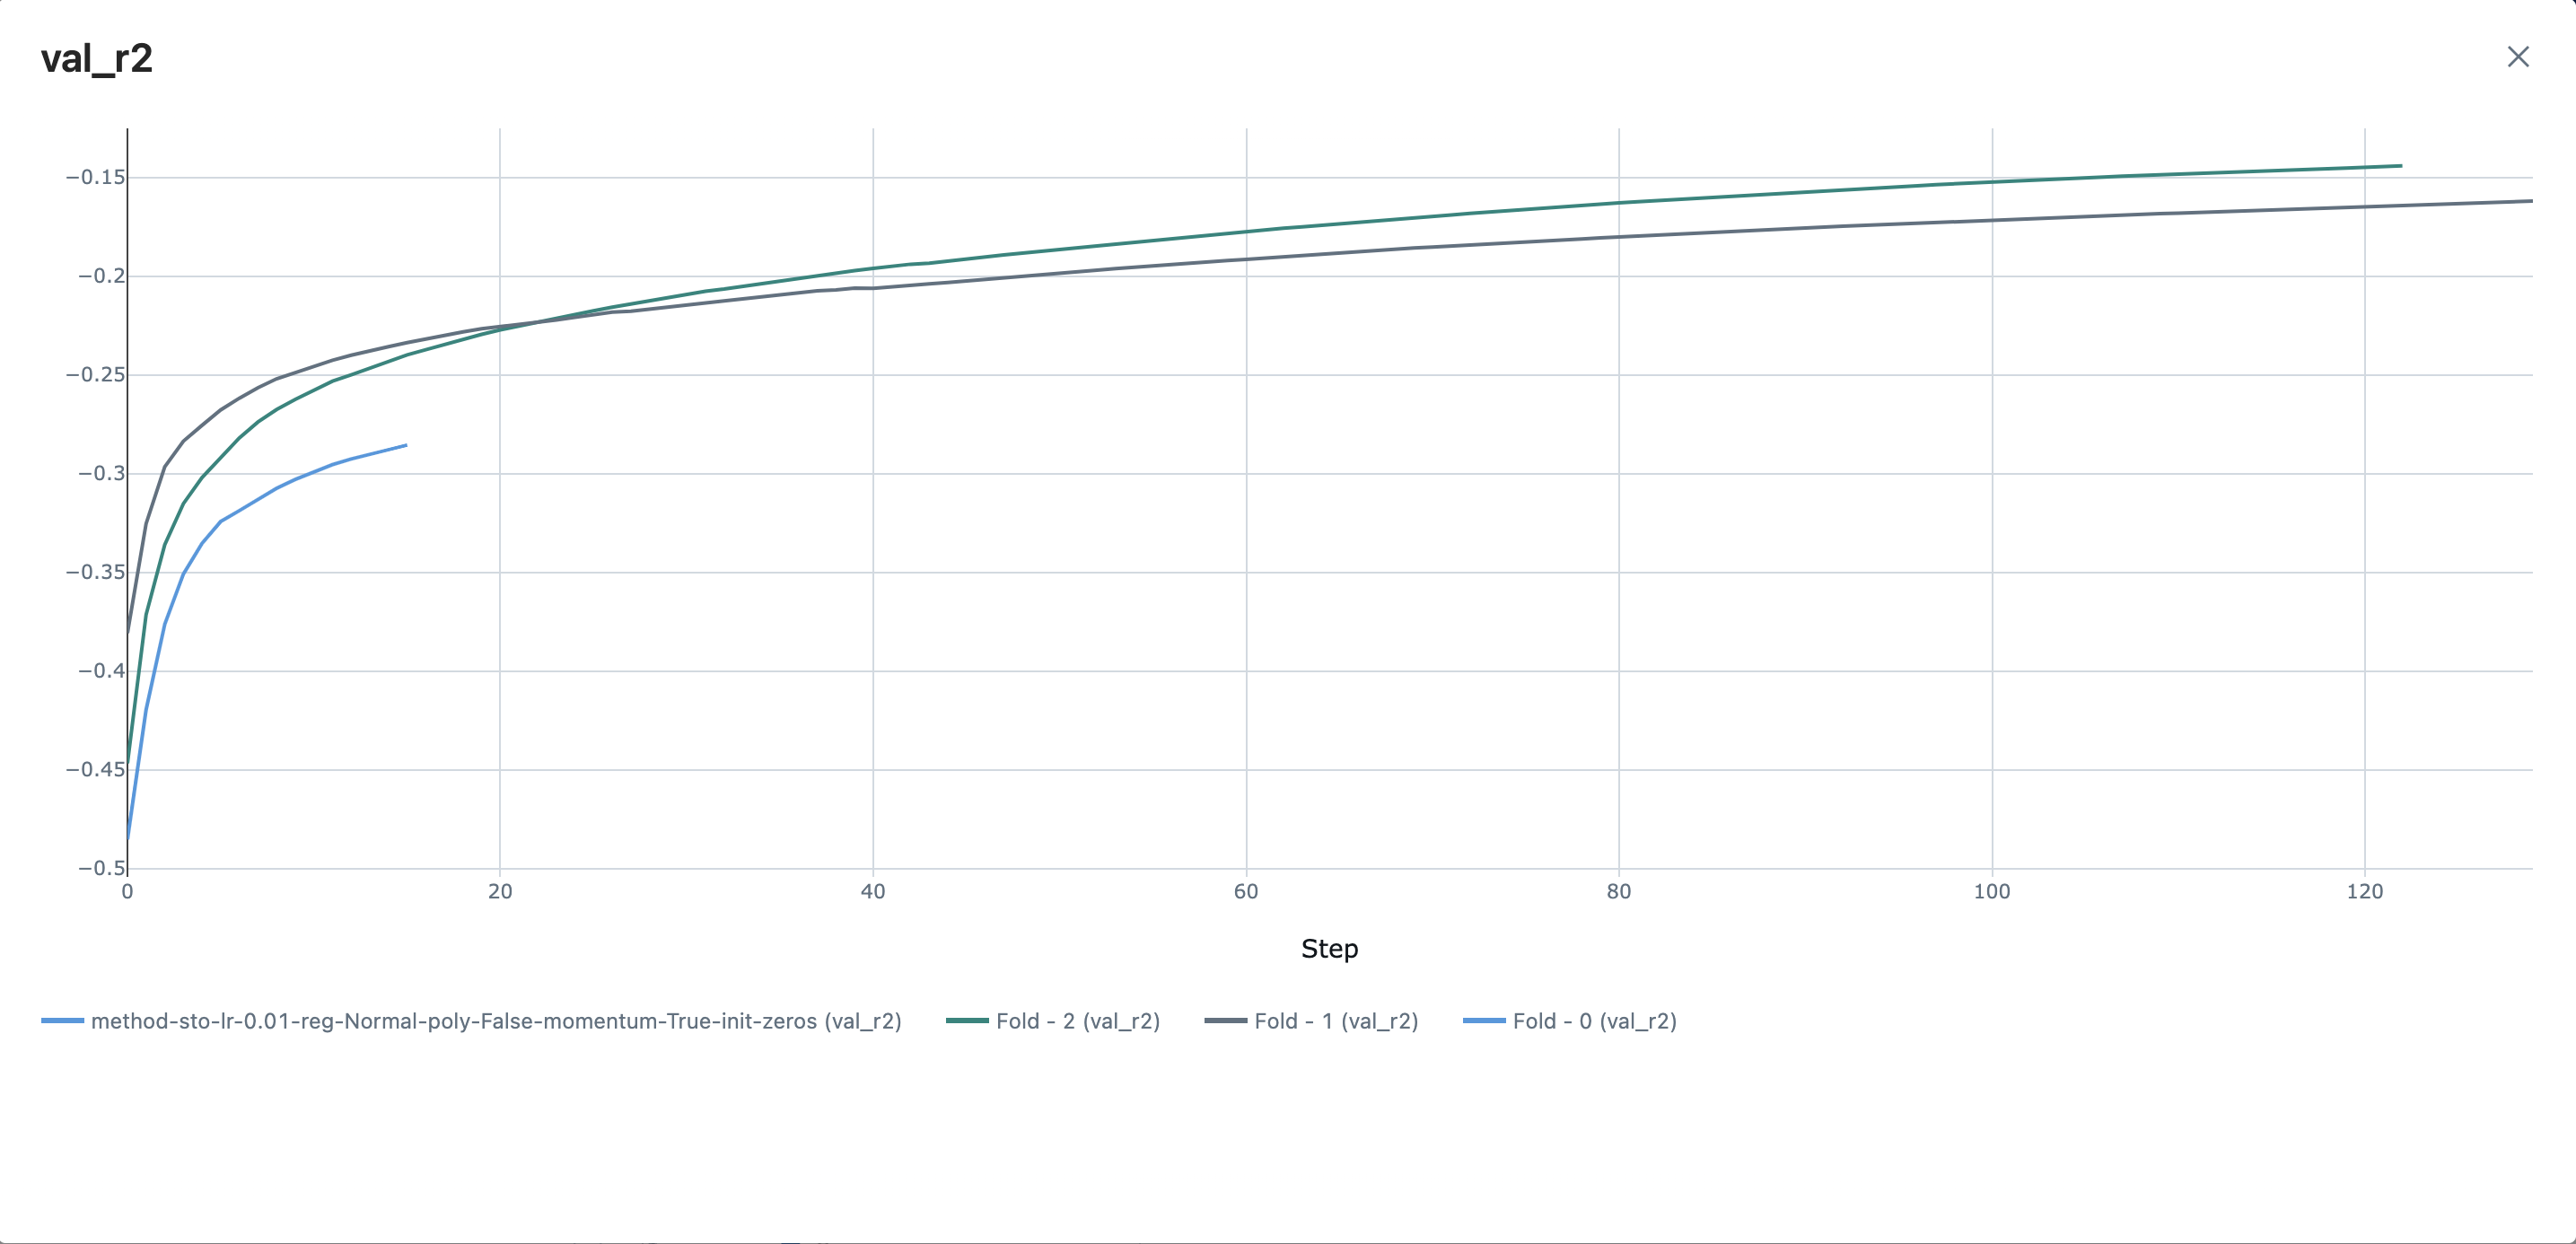

In [184]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_val_r2.png')


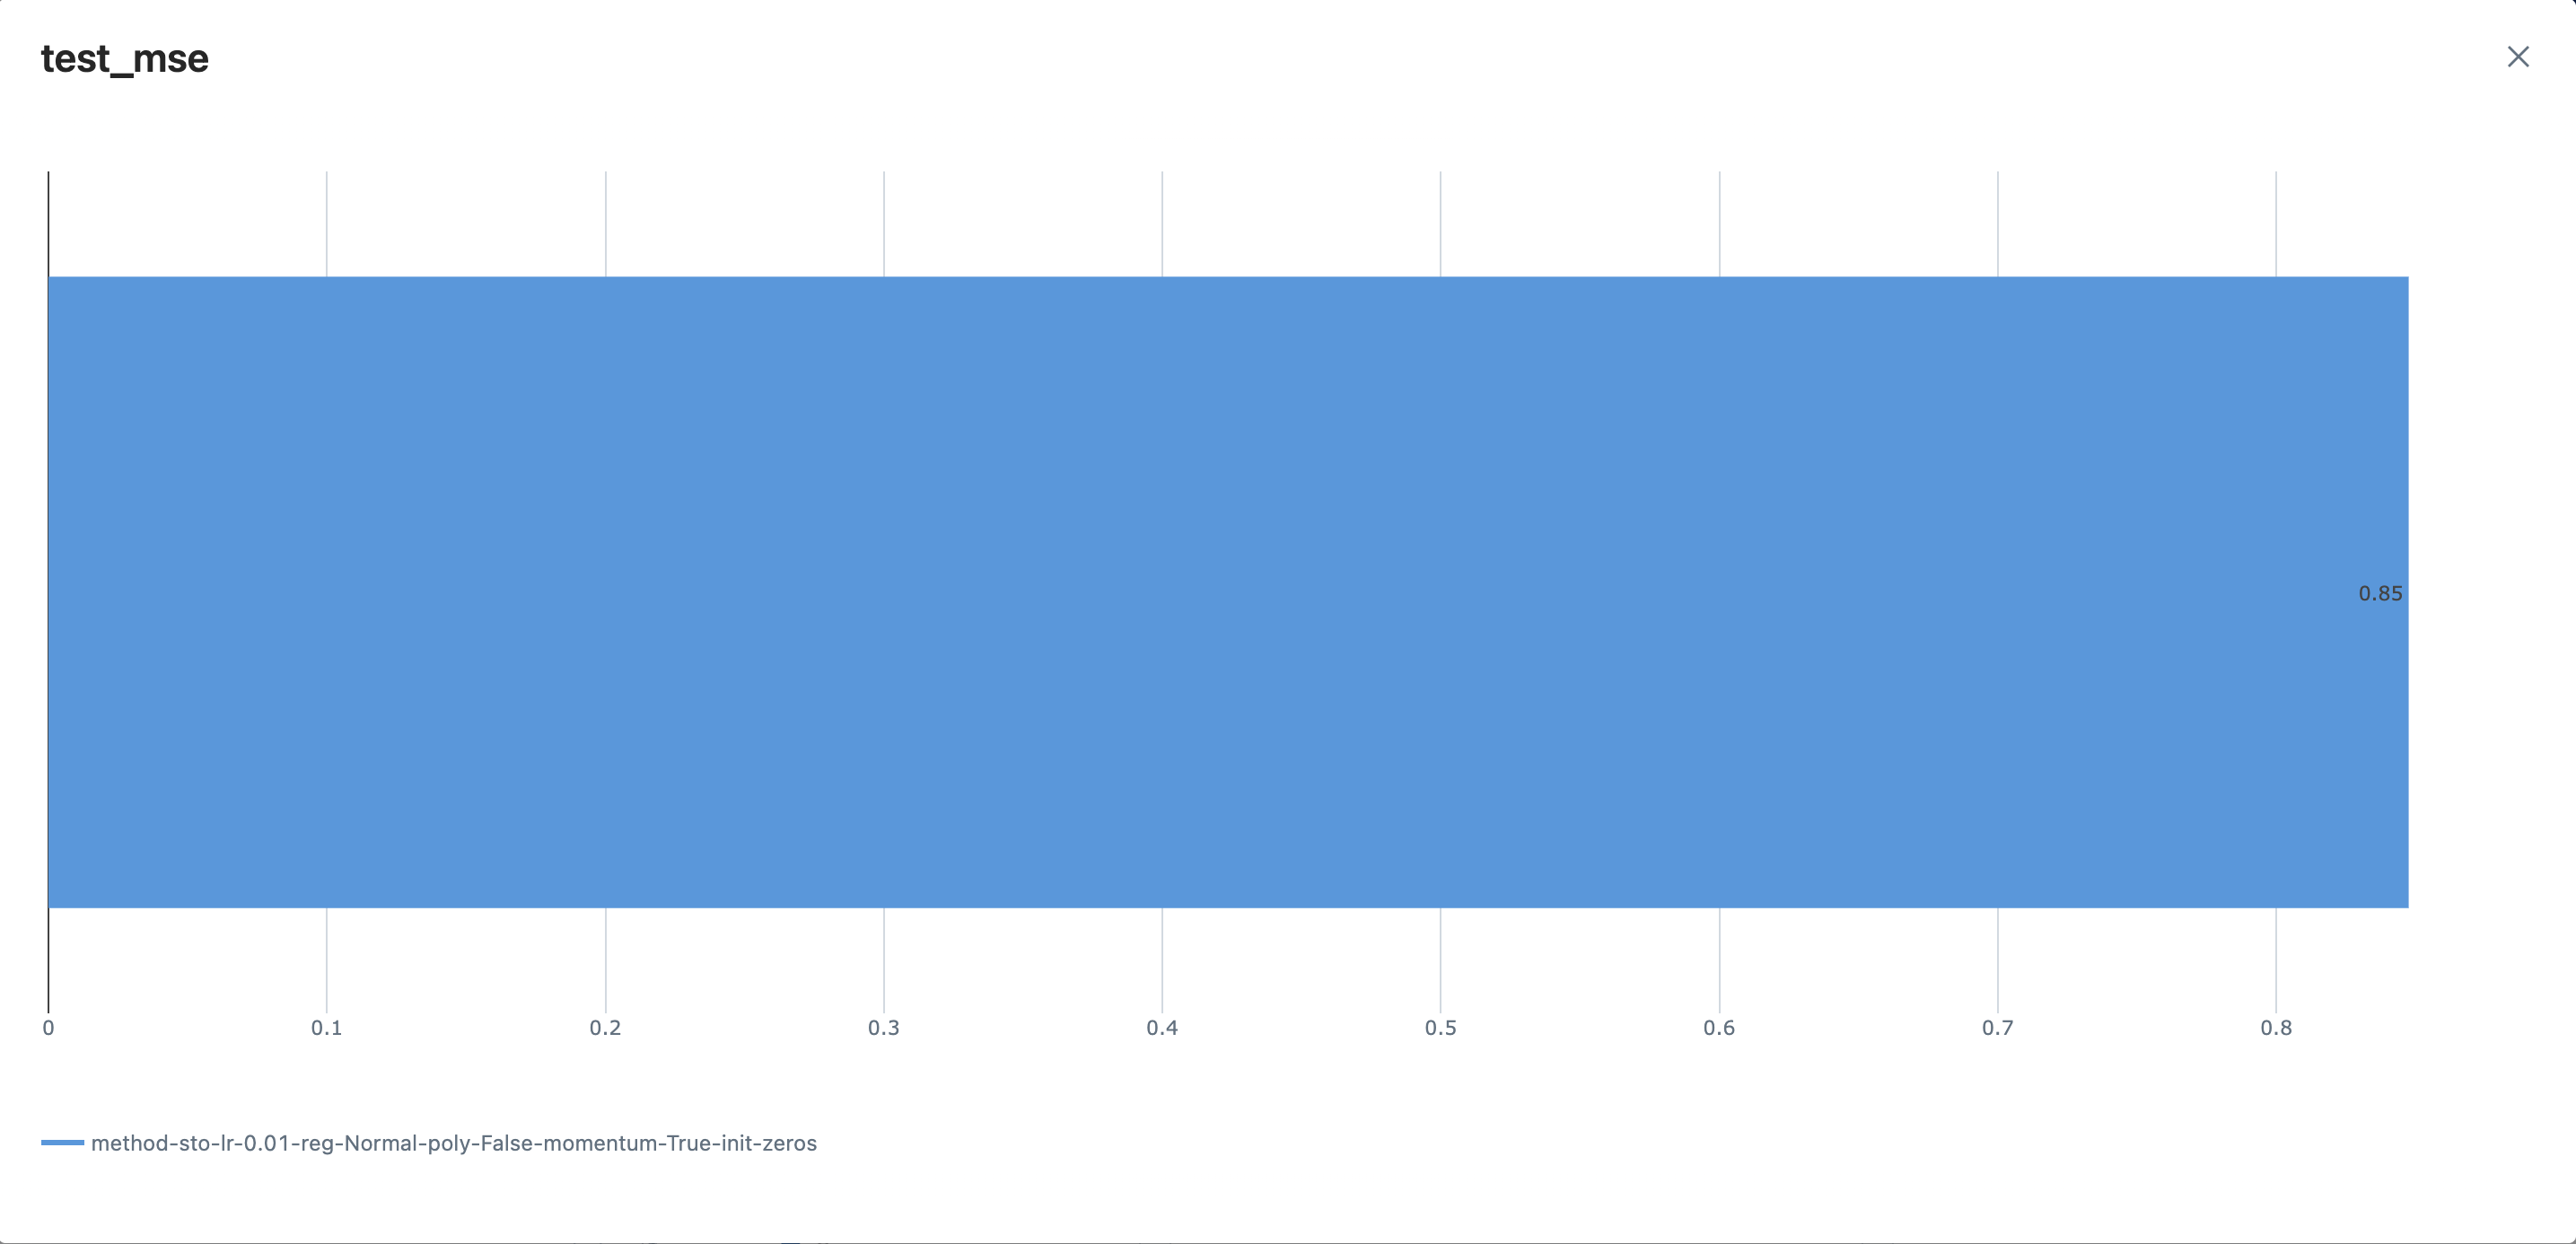

In [185]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_mse.png')


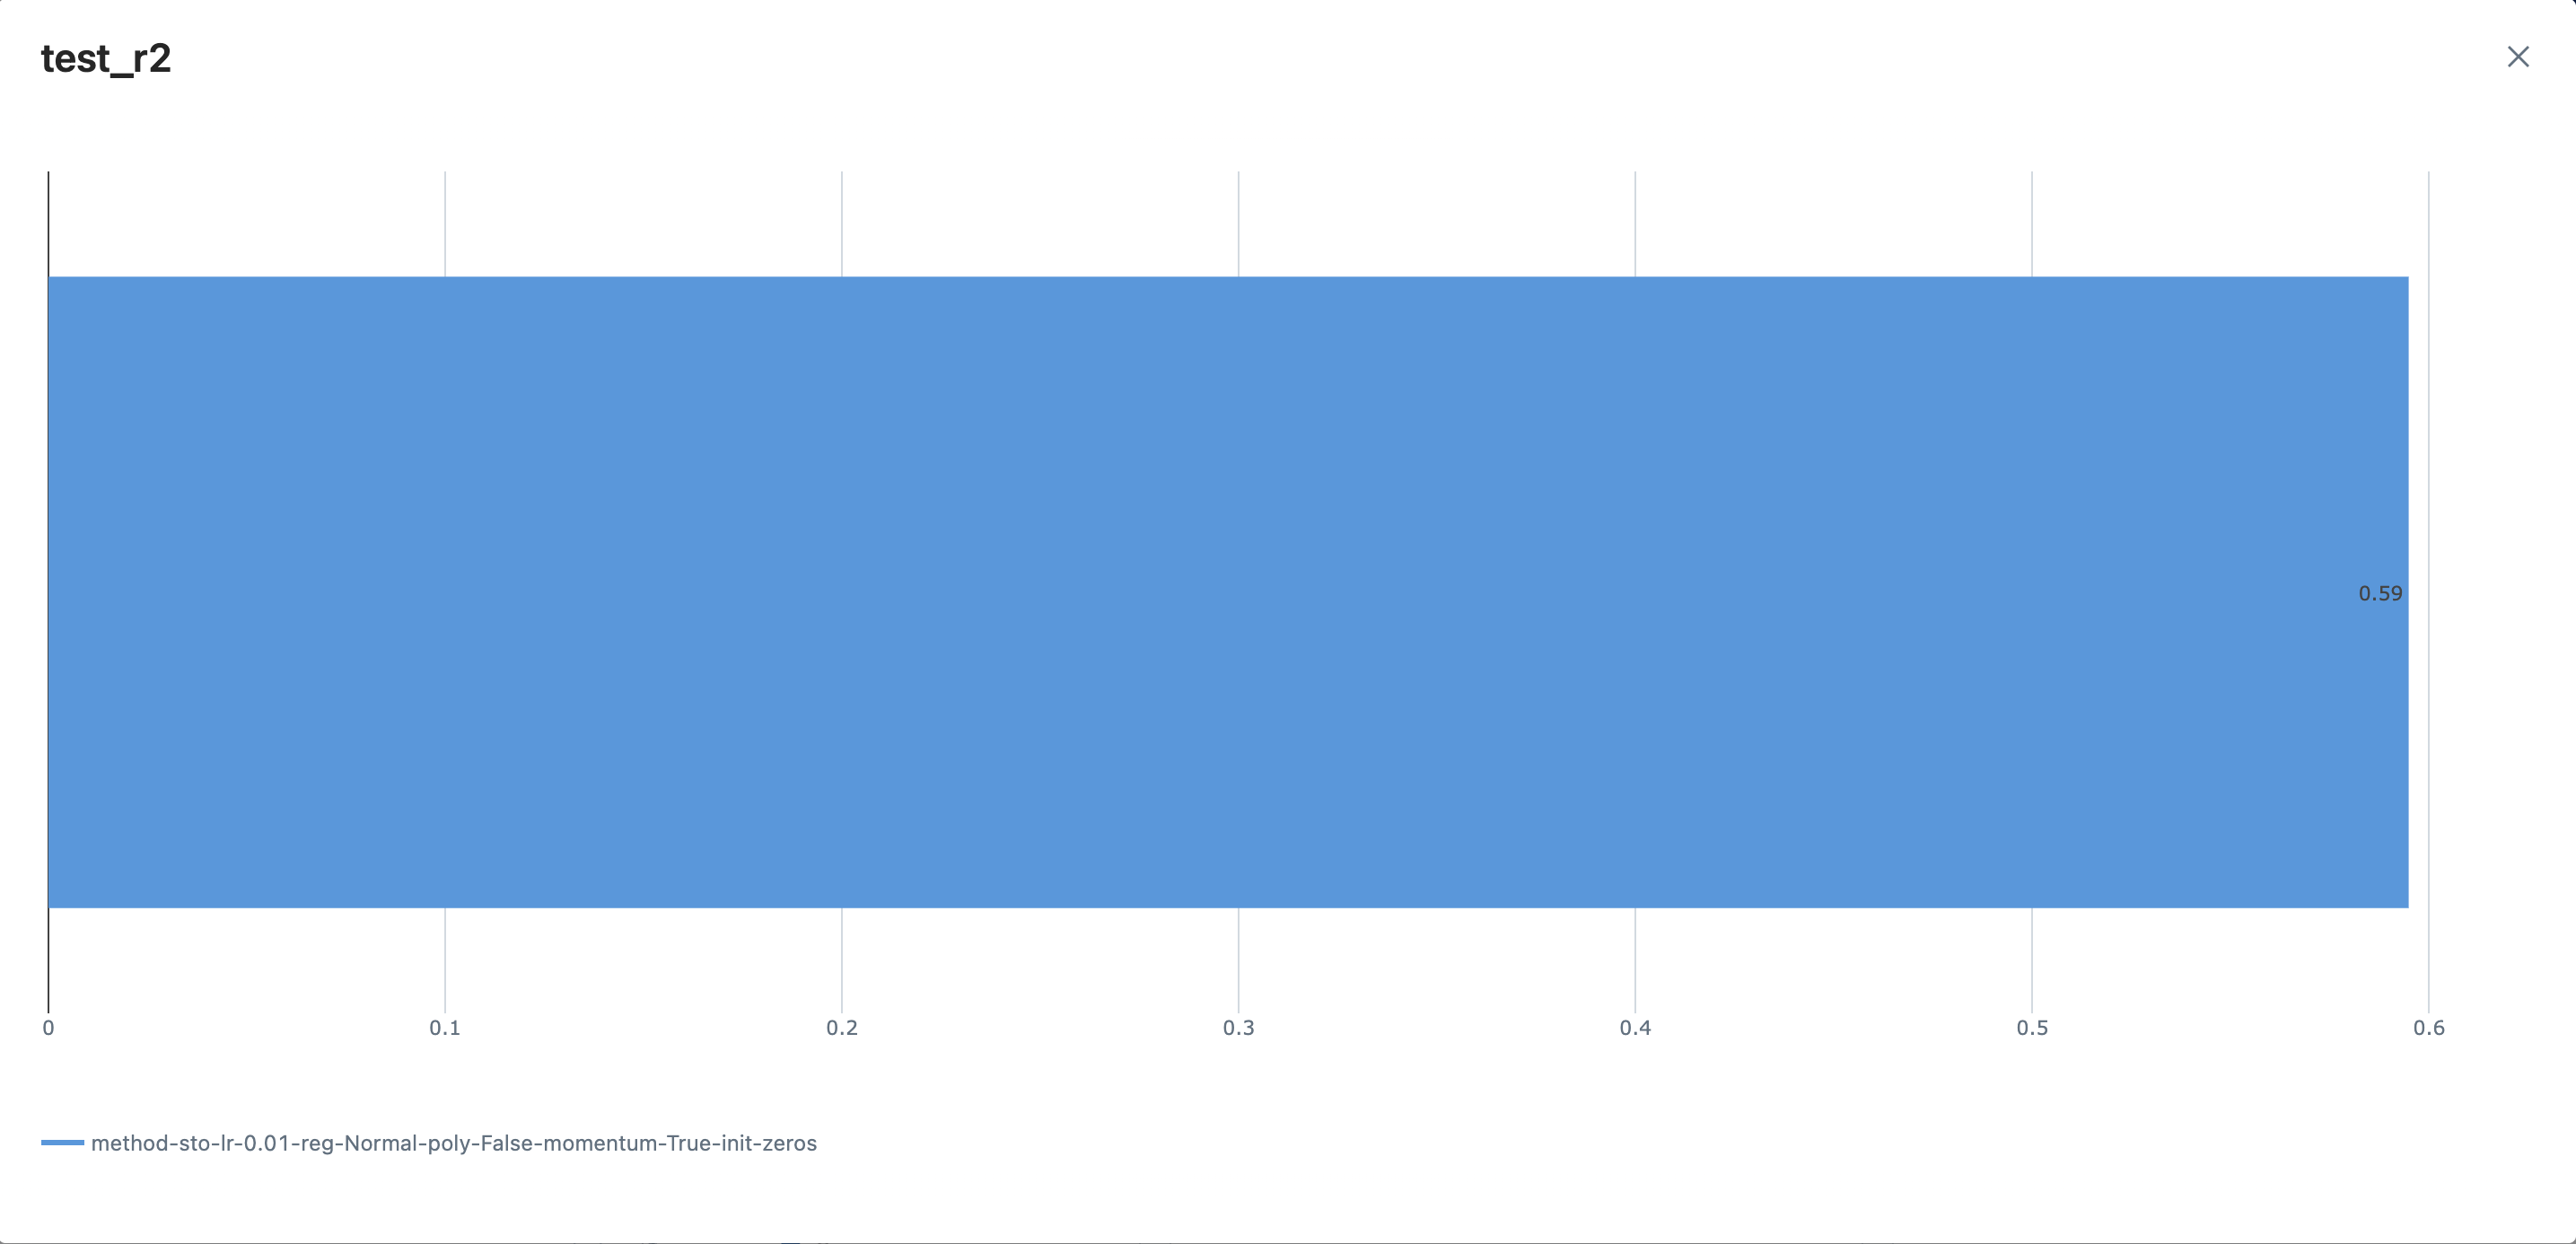

In [186]:

Image(filename='/Users/nipa/Documents/A2-predicting-car-price-isratnipa-main/img/test_r2.png')



From these graphs, we can see a clear improvement in training loss and learning rate of MSE and R² over time. The test produces a much better result than the train, moving towards the positive graph, which may be a good sign for predicting the right selling price later. However, it is not a matter to be completely satisfied with as we are receiving this positive turn in MSE or R².

### Comparison Table of the Experiment Run

| Condition                                      |                |
|------------------------------------------------|----------------|
| **Method**                                     | Stochastic - Sto |
| **Polynomial**                                 | False          |
| **Learning Rate (lr)**                         | 0.01           |
| **Momentum**                                   | True - 0.5     |
| **Weight**                                     | Zeros          |

### Comparison Table for Above Condition

| Regression (Regularization) | Average of test_mse | Average of test_r2 | Best Model |
|------------------------------|----------------------|---------------------|------------|
| Elastic Net                  | 1.499422356          | -1.138281758        | No         |
| Lasso                        | 1.213361985          | -0.730953738        | No         |
| **Normal**                   | **0.804048652**      | **-0.146607659**    | **Yes**    |
| Ridge                        | 4.279832777          | -5.105854142        | No         |